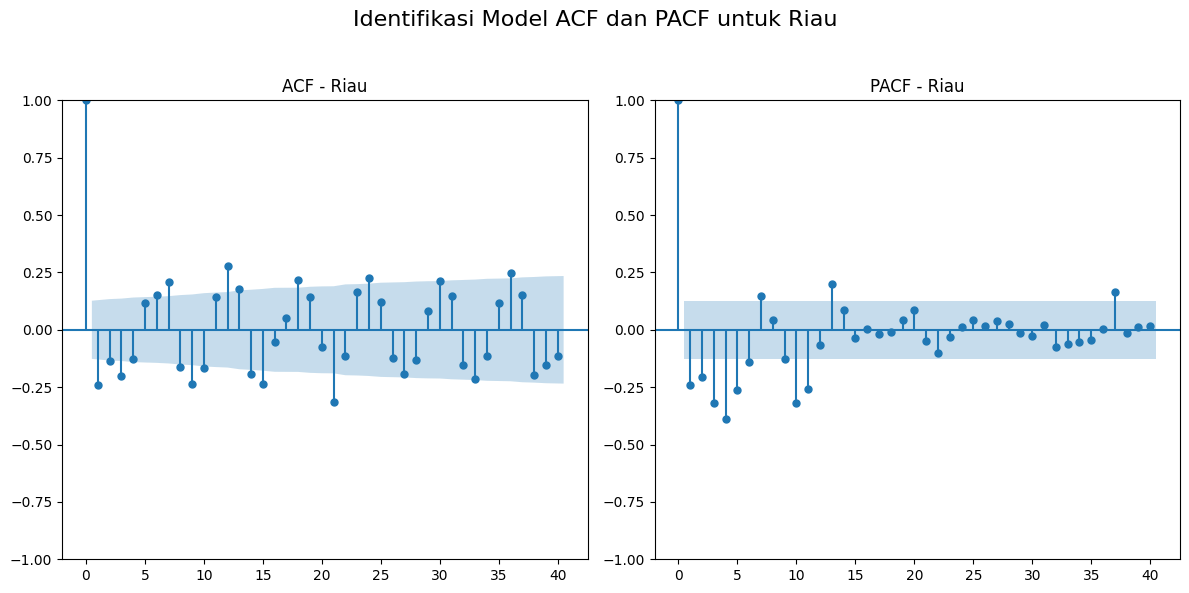

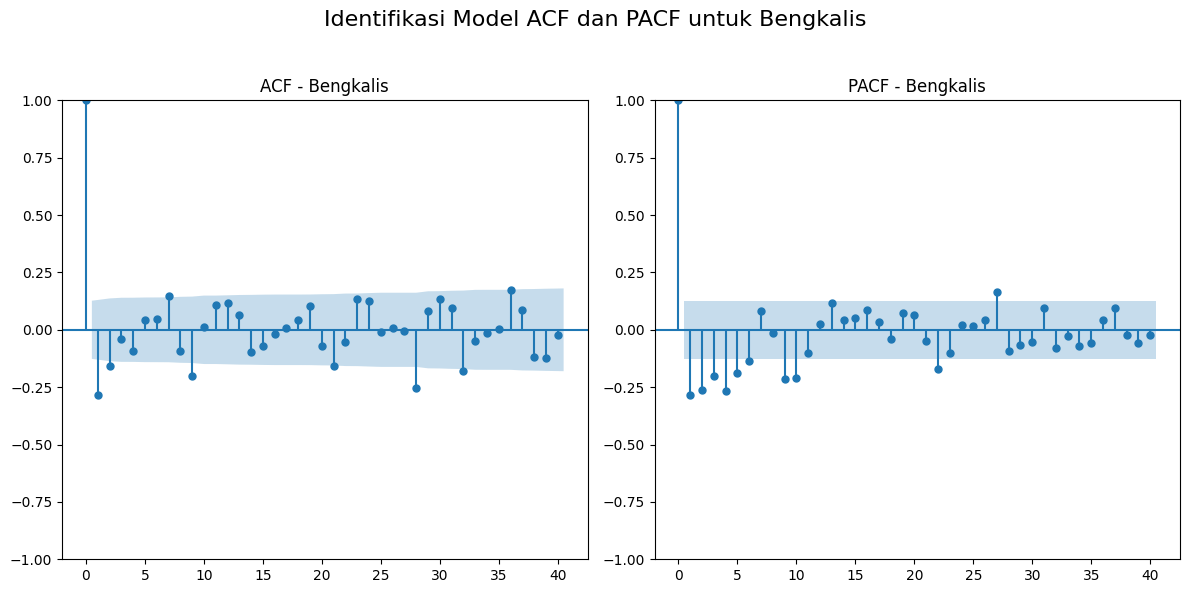

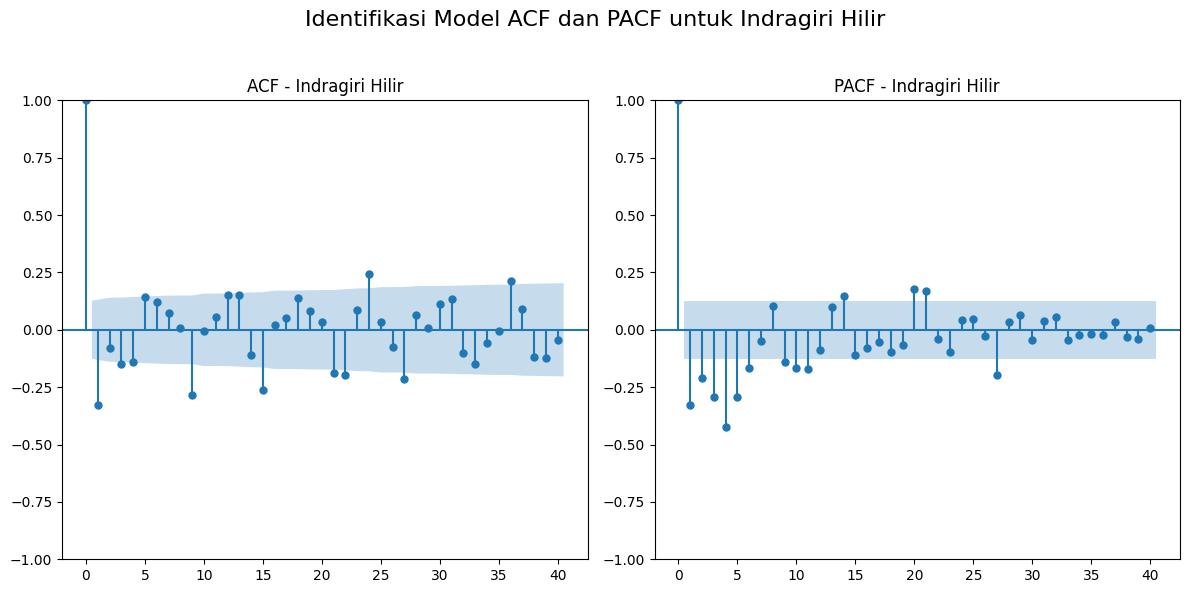

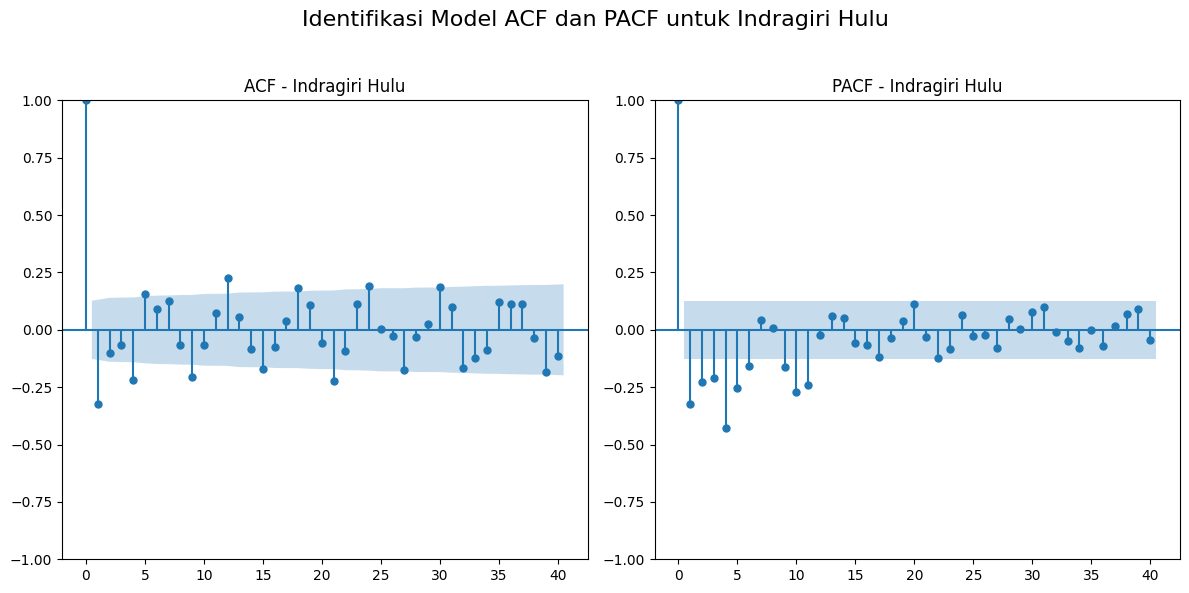

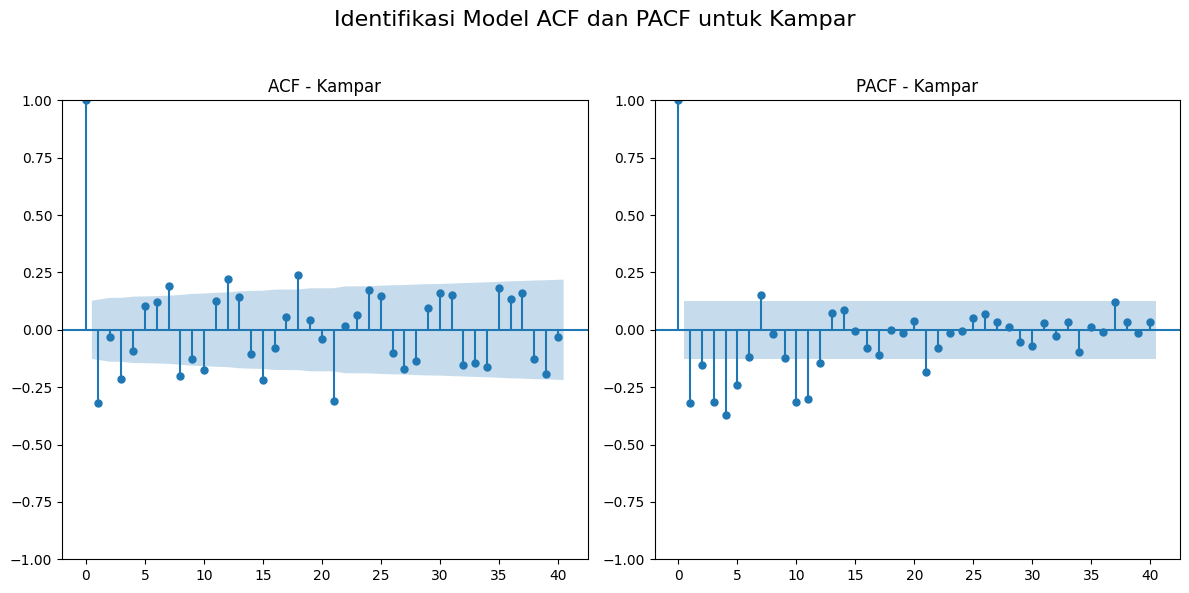

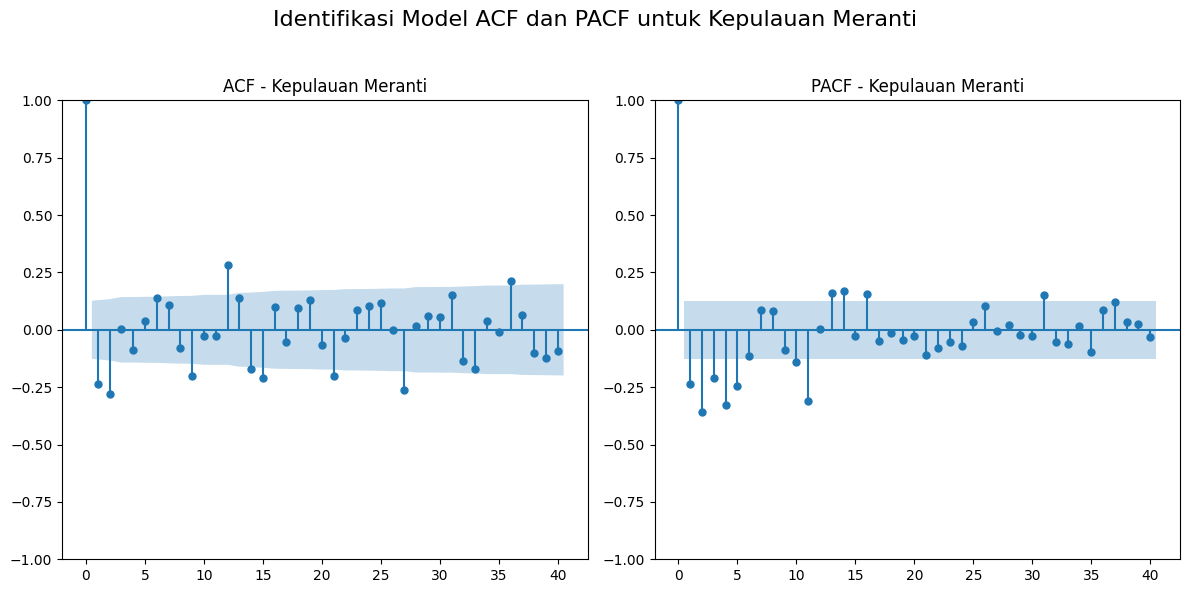

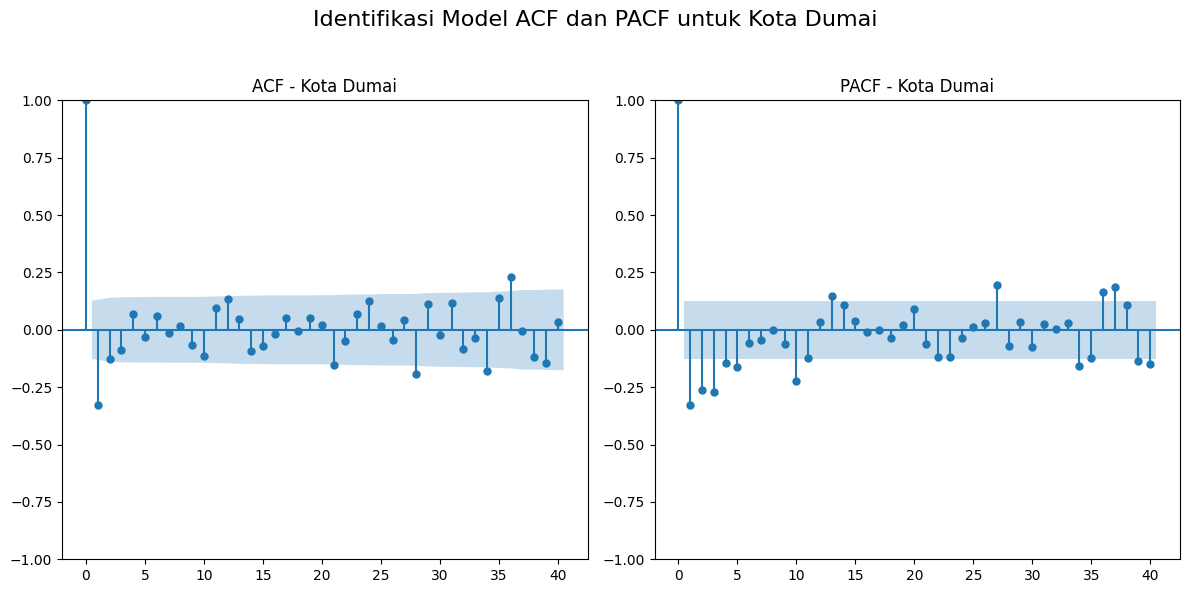

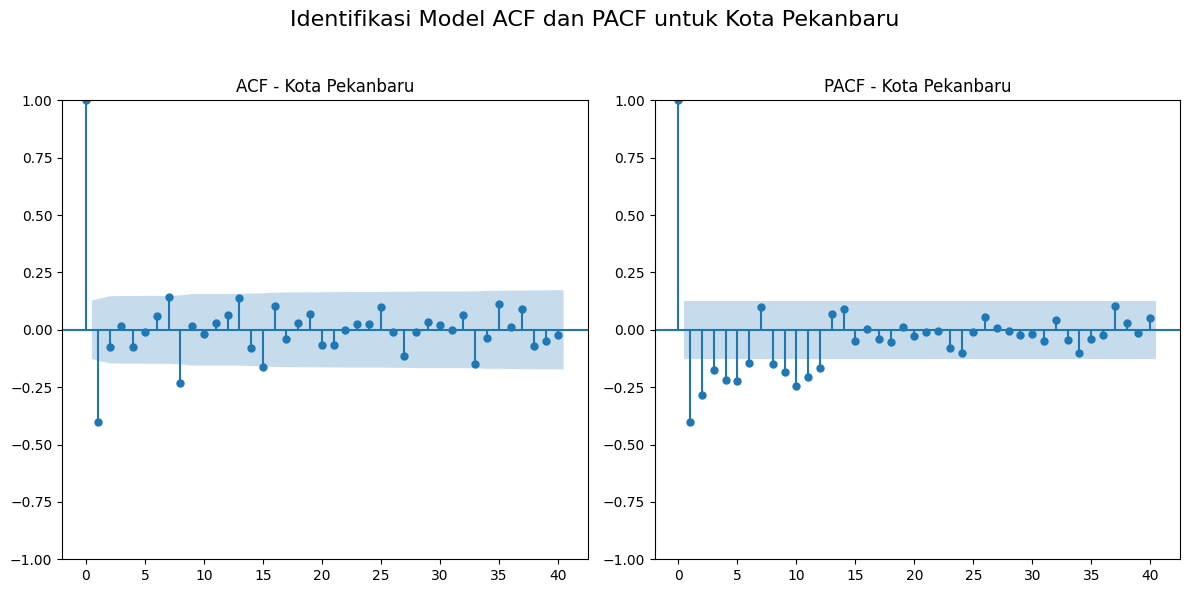

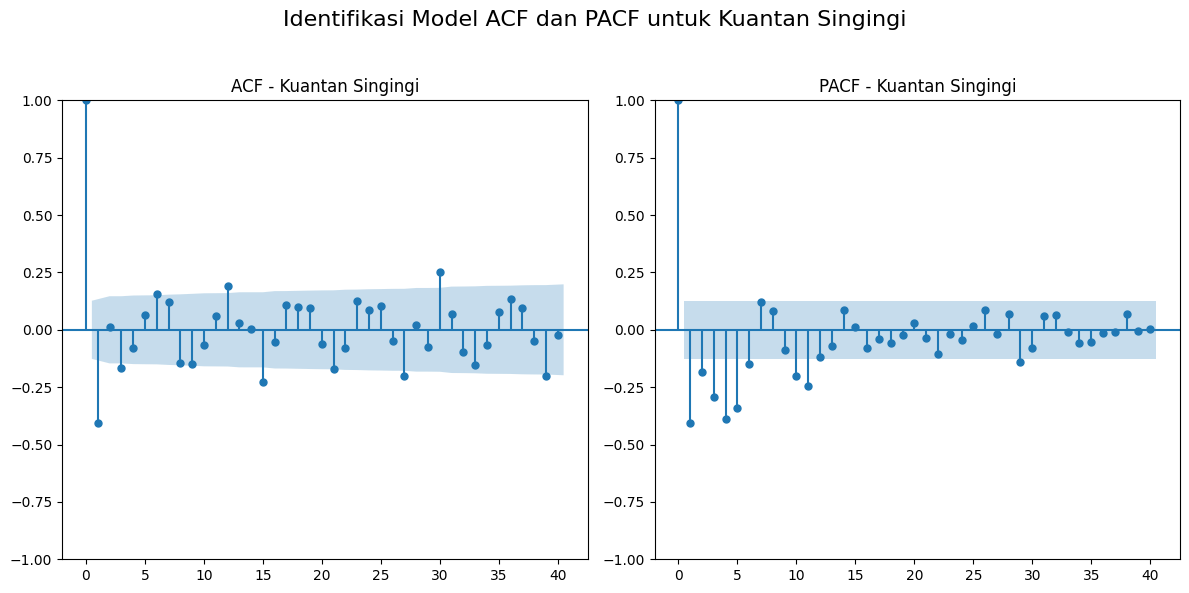

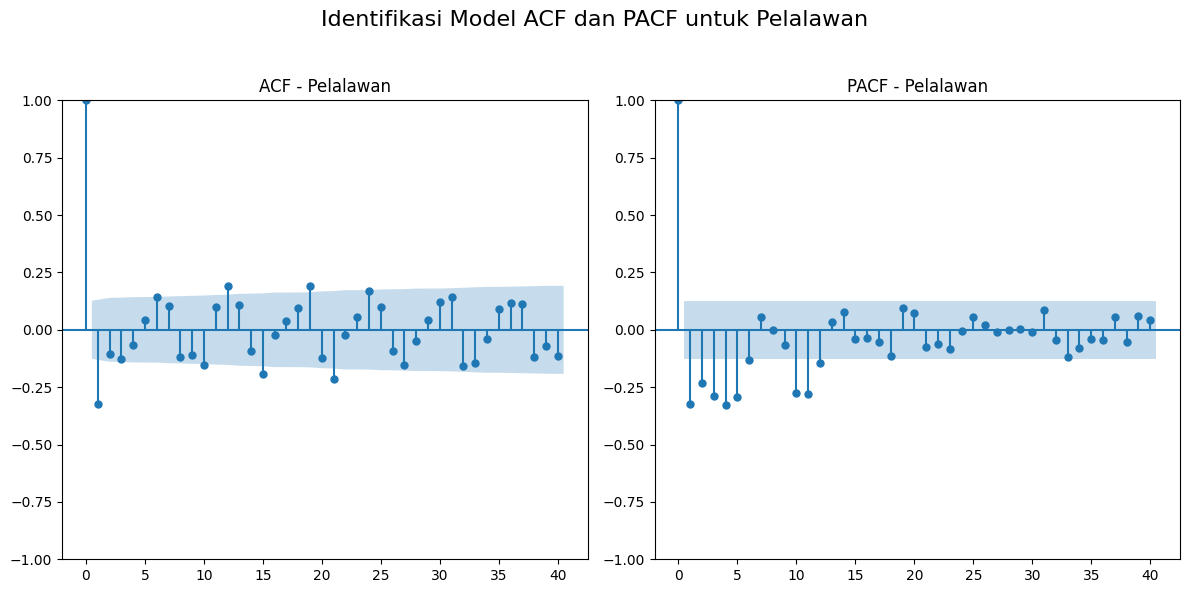

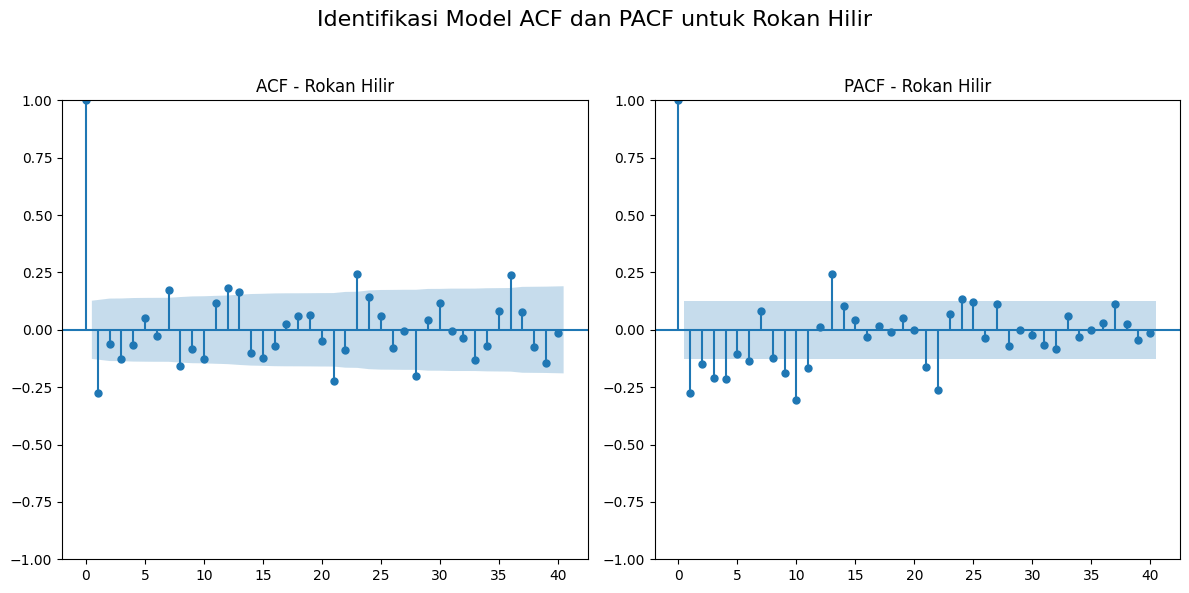

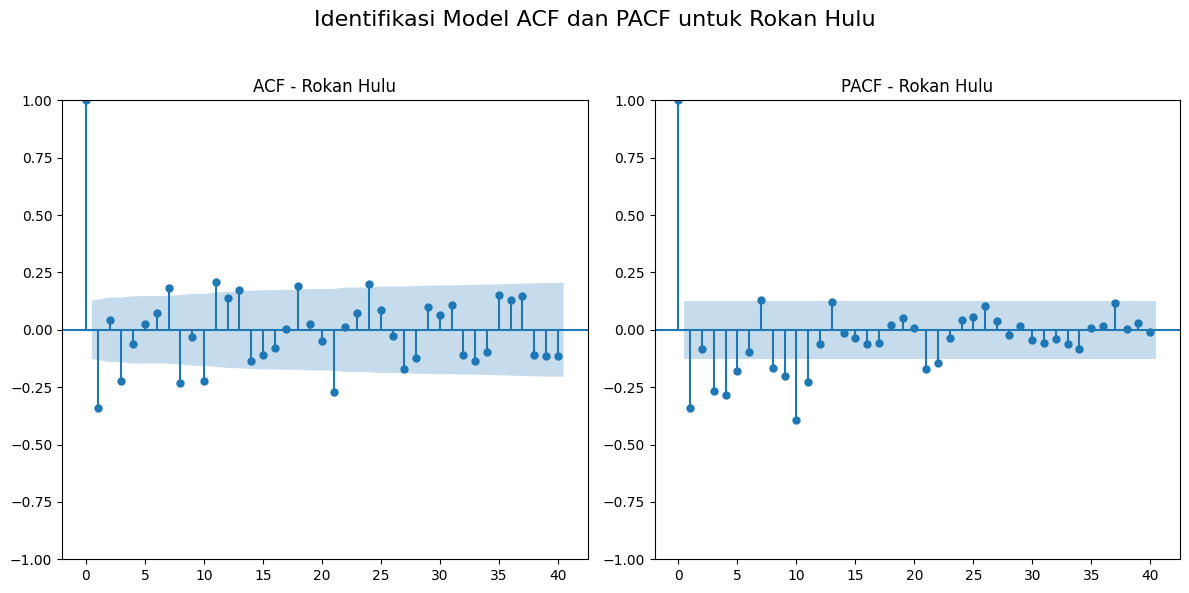

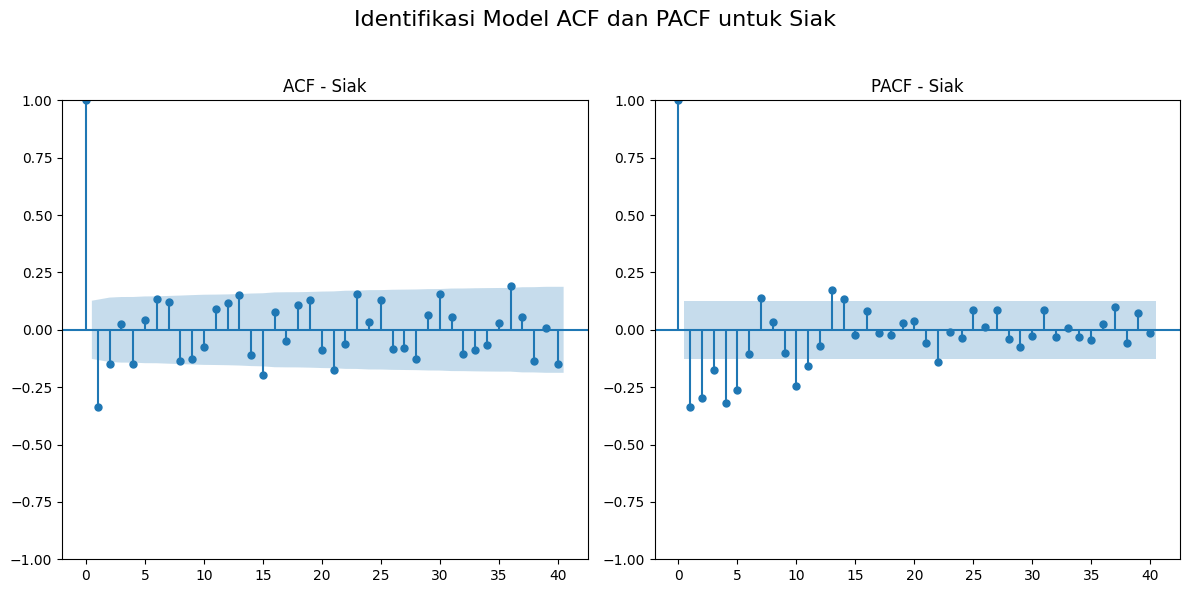

       Kota/Kabupaten  p  q  P (Musiman)  Q (Musiman)
0                Riau  8  5            0            1
1           Bengkalis  7  3            0            0
2     Indragiri Hilir  7  2            0            1
3      Indragiri Hulu  7  2            0            2
4              Kampar  8  2            1            1
5   Kepulauan Meranti  6  3            0            1
6          Kota Dumai  6  2            0            1
7      Kota Pekanbaru  7  2            2            0
8    Kuantan Singingi  7  2            1            1
9           Pelalawan  7  2            1            2
10        Rokan Hilir  5  2            0            1
11         Rokan Hulu  2  2            0            1
12               Siak  6  3            0            0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf


df = pd.read_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx', index_col='Date', parse_dates=True)

# Daftar kota/kabupaten yang ada di data
kota_kabupaten = df['Kota/Kabupaten'].unique()


results_list = []


for kota in kota_kabupaten:
    data_kota = df[df['Kota/Kabupaten'] == kota]['Rata-rata Suhu (°C) - Differenced'].dropna()

    # Plot ACF dan PACF dengan confidence intervals
    plt.figure(figsize=(12, 6))

    # Plot ACF dengan confidence intervals
    plt.subplot(121)
    plot_acf(data_kota, lags=40, alpha=0.05, ax=plt.gca())
    plt.title(f'ACF - {kota}')

    # Plot PACF dengan confidence intervals
    plt.subplot(122)
    plot_pacf(data_kota, lags=40, alpha=0.05, ax=plt.gca())
    plt.title(f'PACF - {kota}')

    plt.suptitle(f'Identifikasi Model ACF dan PACF untuk {kota}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Hitung ACF dan PACF
    acf_vals = acf(data_kota, nlags=40)
    pacf_vals = pacf(data_kota, nlags=40)

    # Automatic threshold dari statsmodels' plot (1.96 / sqrt(N))
    N = len(data_kota)
    threshold = 1.96 / N**0.5

    # Determine p dan q dari PACF and ACF (untuk non-seasonal components)
    p = next((i for i, val in enumerate(pacf_vals) if abs(val) < threshold), 1)  # First significant lag in PACF
    q = next((i for i, val in enumerate(acf_vals) if abs(val) < threshold), 1)   # First significant lag in ACF

    # Determine P dan Q dari seasonal PACF dan ACF
    P = next((i for i, val in enumerate(pacf_vals[12::12]) if abs(val) < threshold), 1)  # Seasonality at lag 12
    Q = next((i for i, val in enumerate(acf_vals[12::12]) if abs(val) < threshold), 1)   # Seasonality at lag 12

    # Append results ke list sebagai dictionary
    results_list.append({'Kota/Kabupaten': kota, 'p': p, 'q': q, 'P (Musiman)': P, 'Q (Musiman)': Q})

# buat DataFrame dari hasil list setelah loop
results = pd.DataFrame(results_list)

# tampilkan results
print(results)

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx', index_col='Date', parse_dates=True)

# Daftar kota/kabupaten yang ada di data
kota_kabupaten = df['Kota/Kabupaten'].unique()

results_list = []


for kota in kota_kabupaten:
    data_kota = df[df['Kota/Kabupaten'] == kota]['Rata-rata Suhu (°C) - Differenced'].dropna()
    N = len(data_kota)


    acf_vals = acf(data_kota, nlags=40)
    pacf_vals = pacf(data_kota, nlags=40)


    threshold = 1.96 / np.sqrt(N)


    p = next((i for i, val in enumerate(pacf_vals) if abs(val) < threshold), 1)  # First significant lag di PACF
    q = next((i for i, val in enumerate(acf_vals) if abs(val) < threshold), 1)   # First significant lag di ACF


    P = next((i for i, val in enumerate(pacf_vals[12::12]) if abs(val) < threshold), 1)  # Seasonality ketika lag 12
    Q = next((i for i, val in enumerate(acf_vals[12::12]) if abs(val) < threshold), 1)   # Seasonality ketika lag 12


    results_list.append({'Kota/Kabupaten': kota, 'p': p, 'q': q, 'P (Musiman)': P, 'Q (Musiman)': Q})


results = pd.DataFrame(results_list)


print(results)

       Kota/Kabupaten  p  q  P (Musiman)  Q (Musiman)
0                Riau  8  5            0            1
1           Bengkalis  7  3            0            0
2     Indragiri Hilir  7  2            0            1
3      Indragiri Hulu  7  2            0            2
4              Kampar  8  2            1            1
5   Kepulauan Meranti  6  3            0            1
6          Kota Dumai  6  2            0            1
7      Kota Pekanbaru  7  2            2            0
8    Kuantan Singingi  7  2            1            1
9           Pelalawan  7  2            1            2
10        Rokan Hilir  5  2            0            1
11         Rokan Hulu  2  2            0            1
12               Siak  6  3            0            0


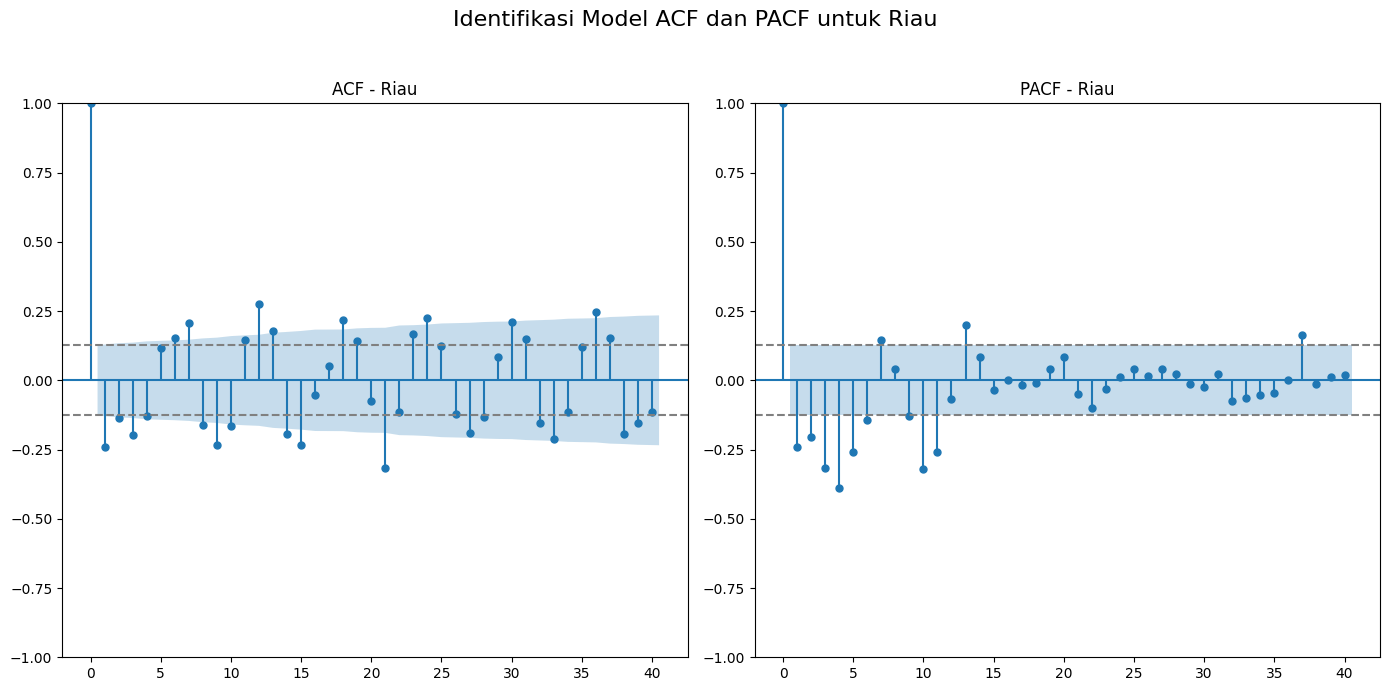

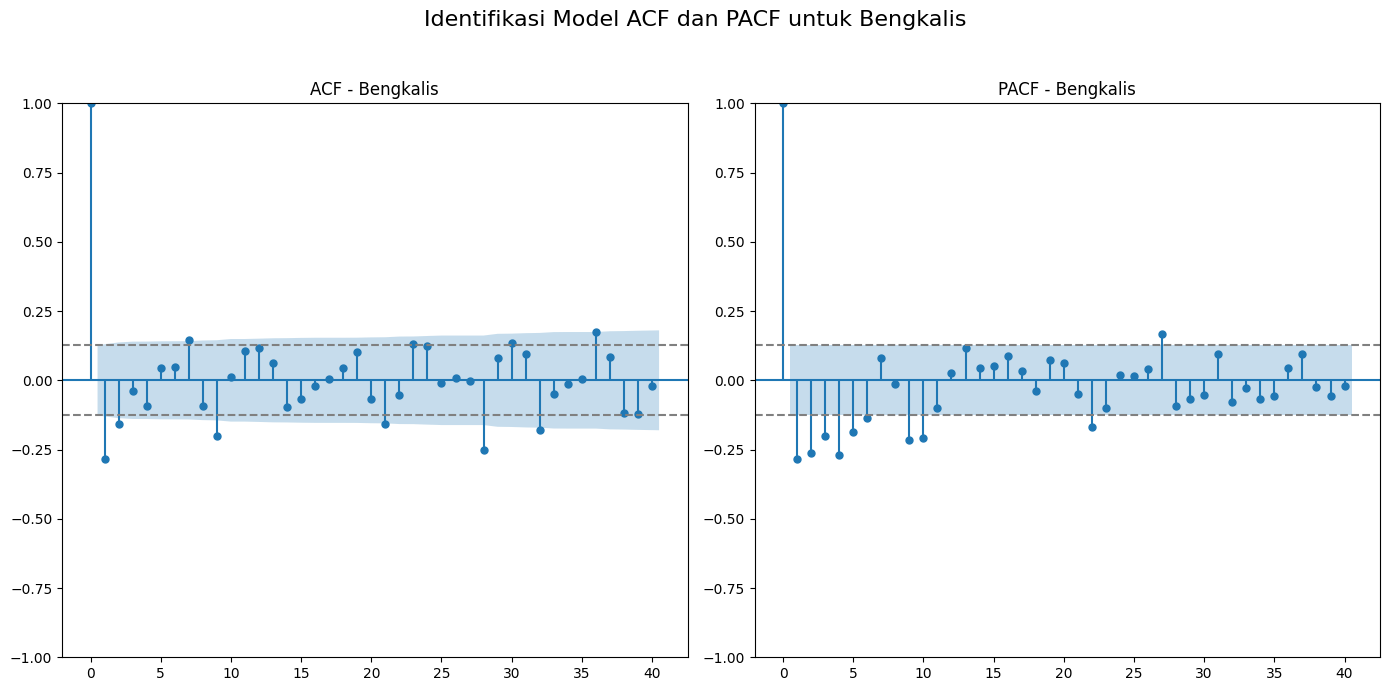

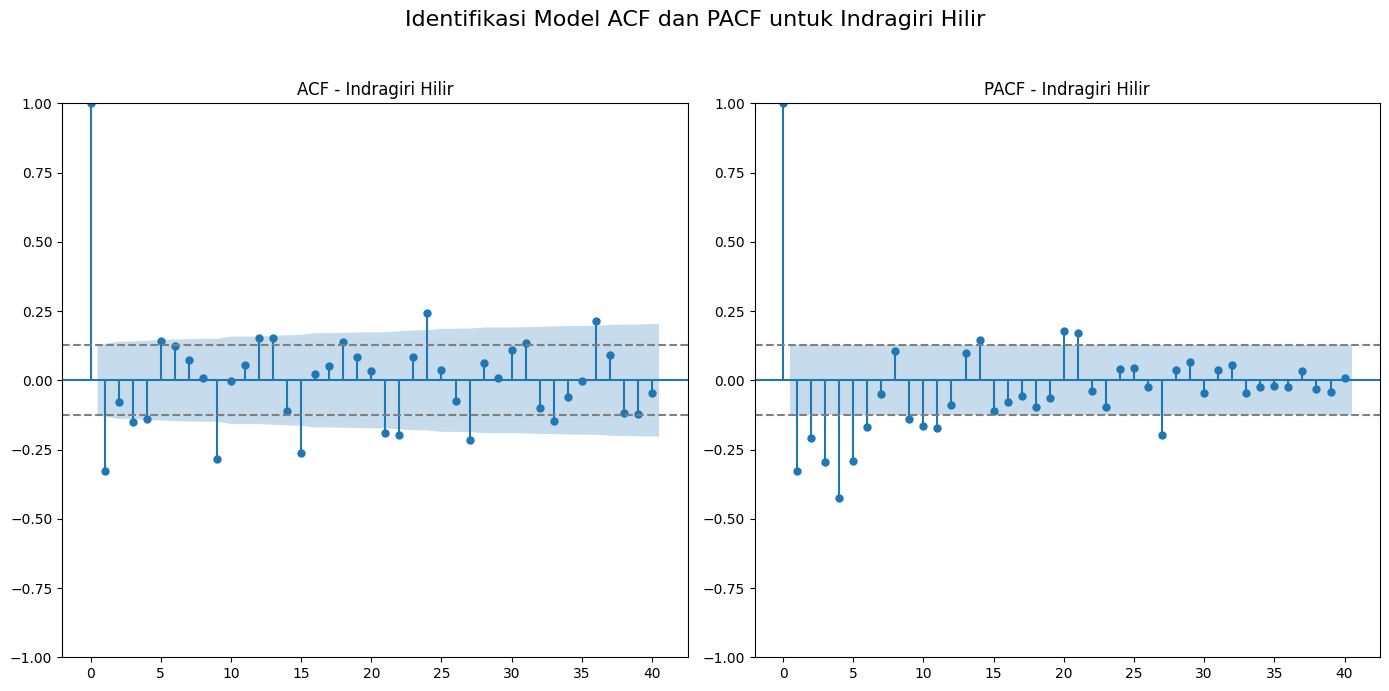

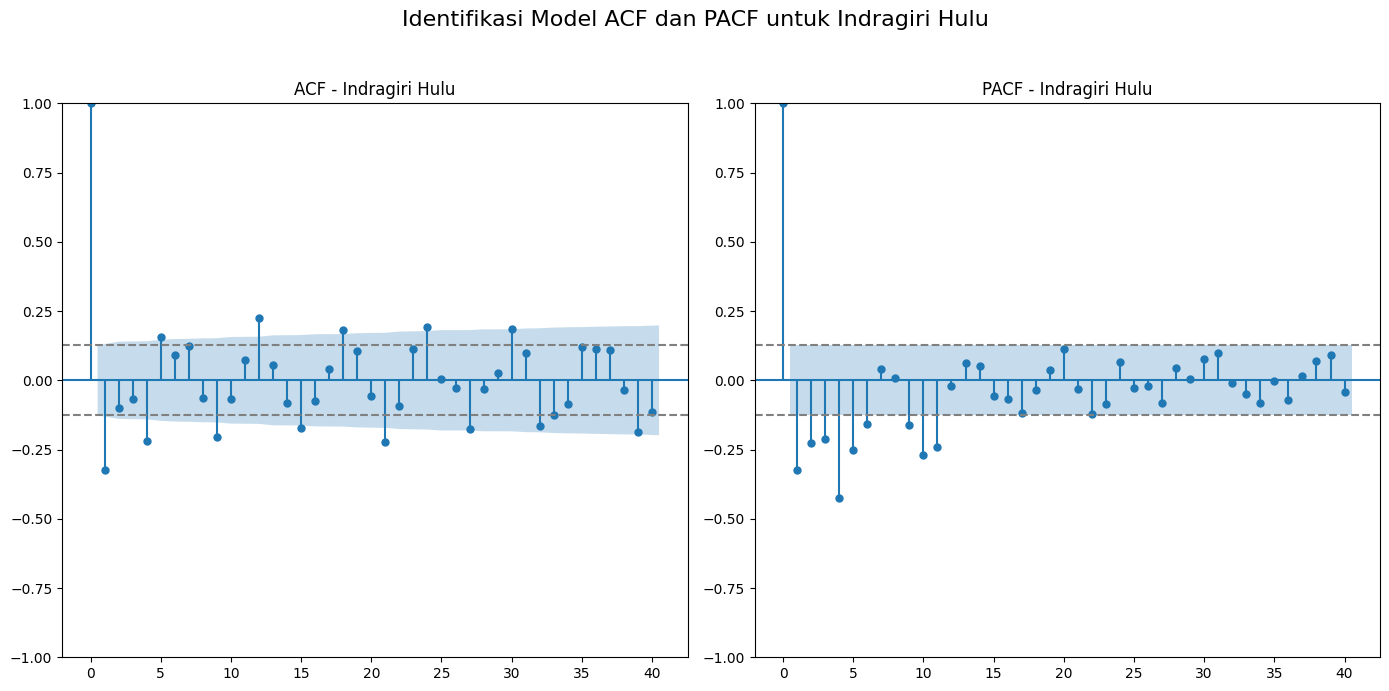

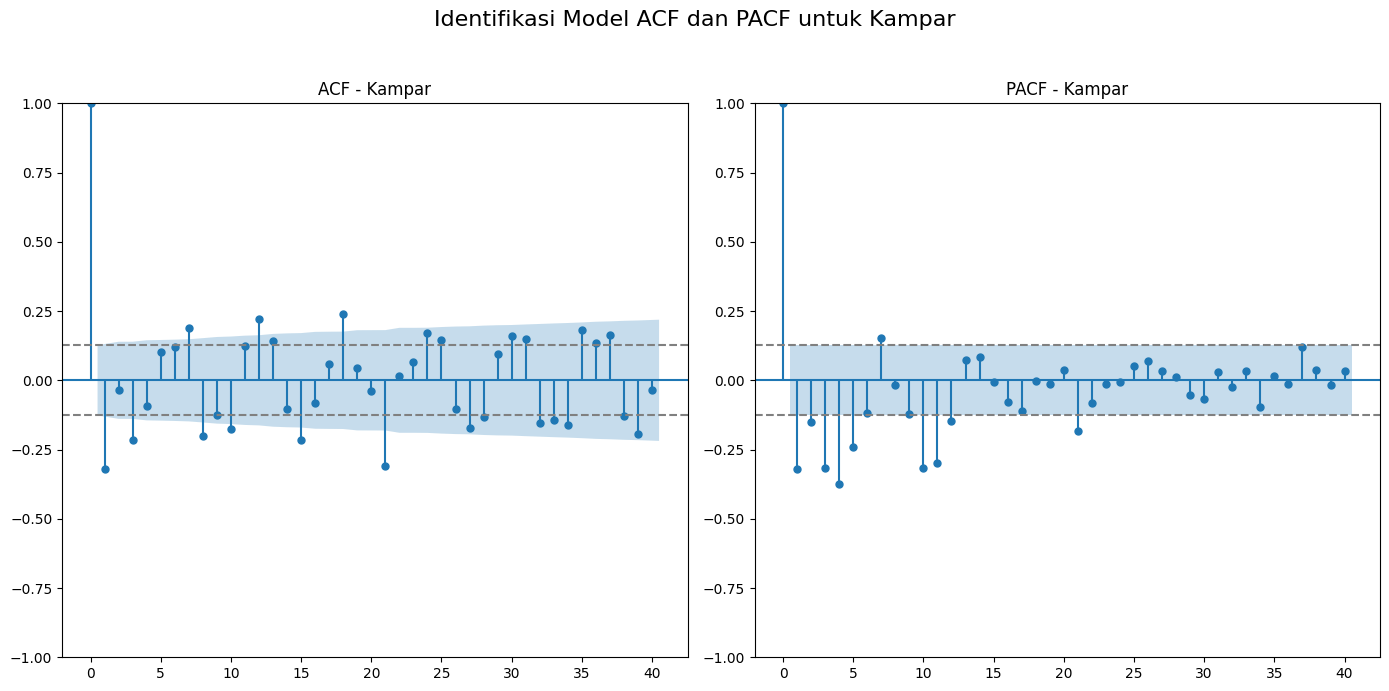

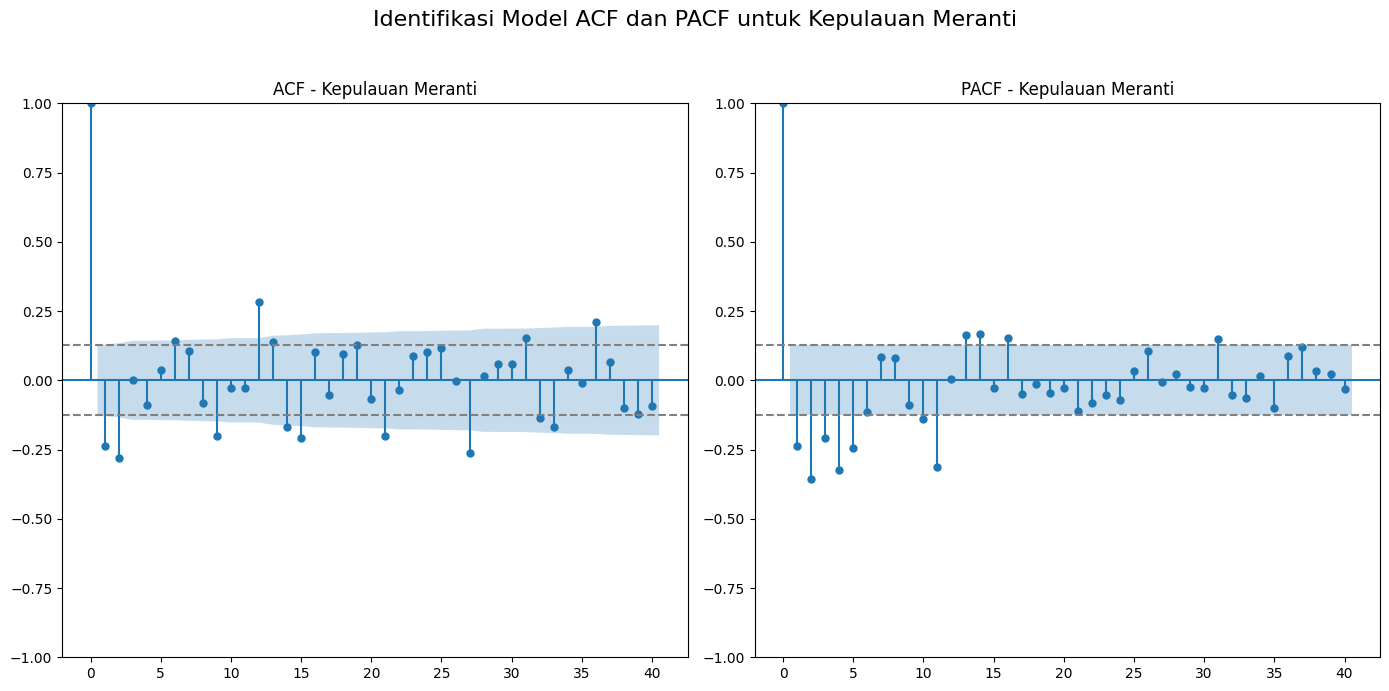

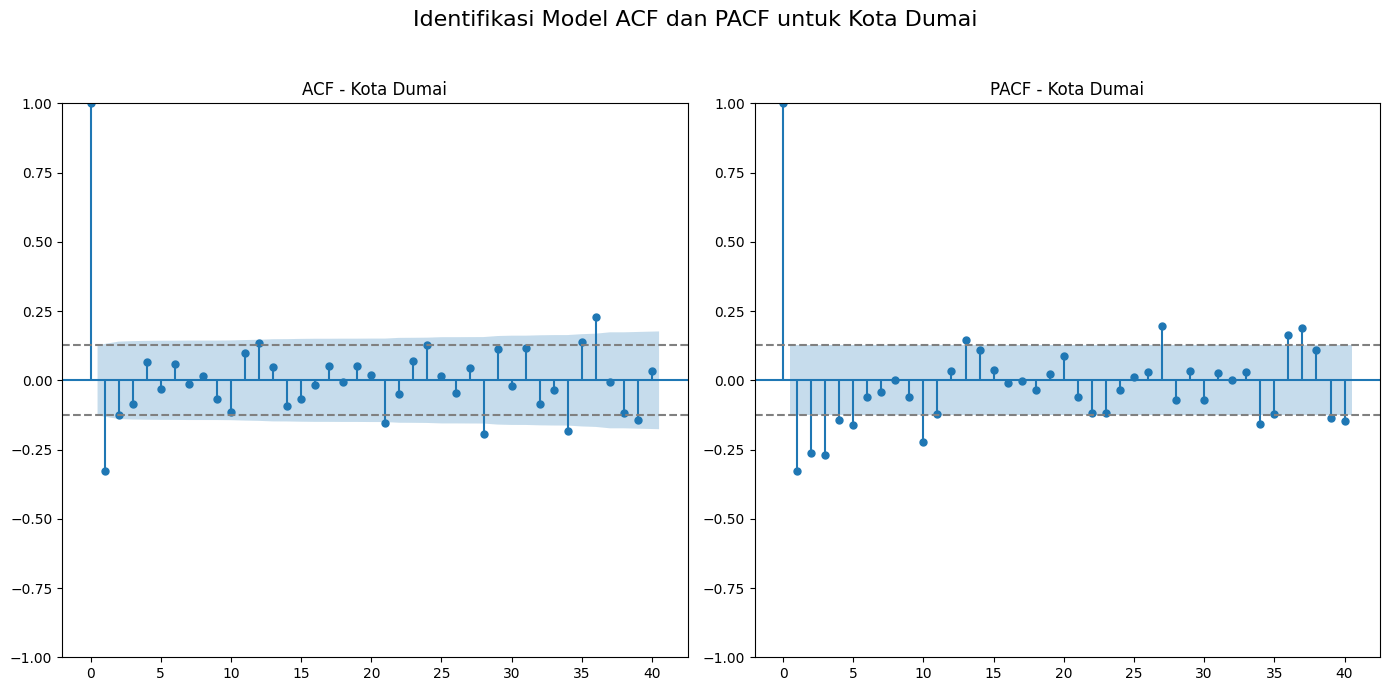

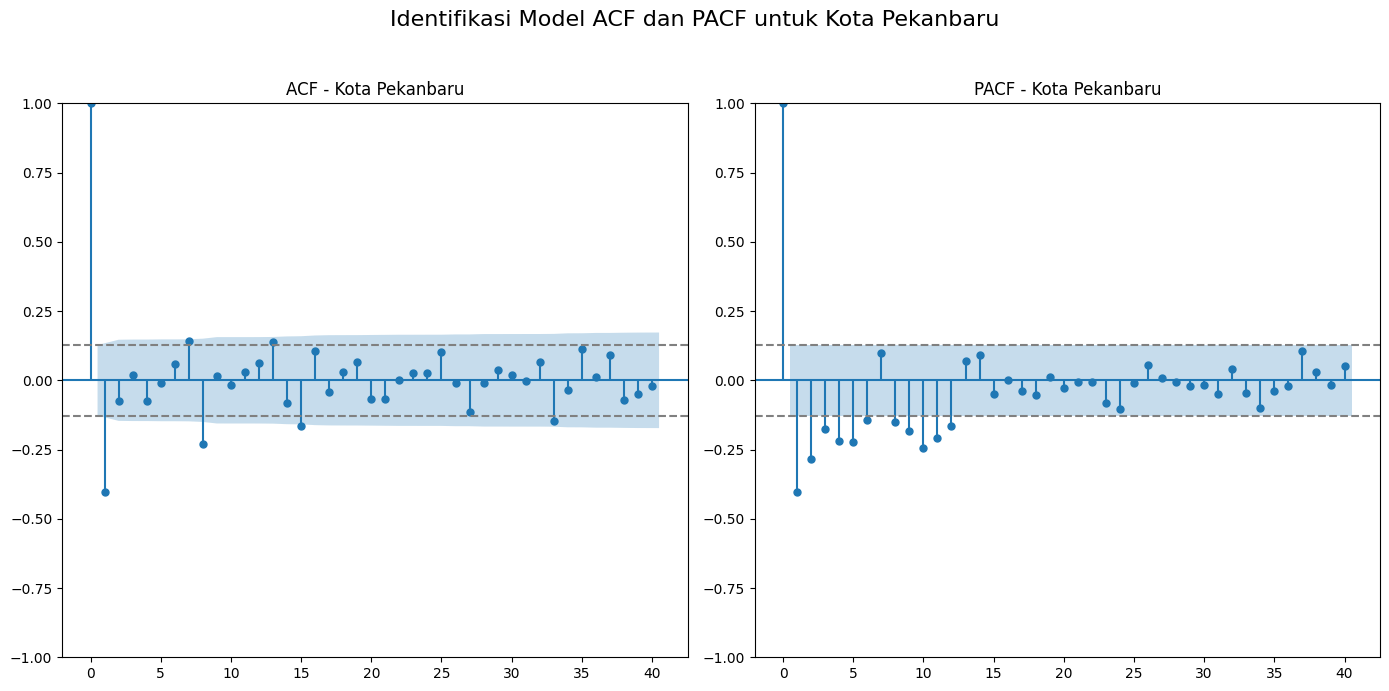

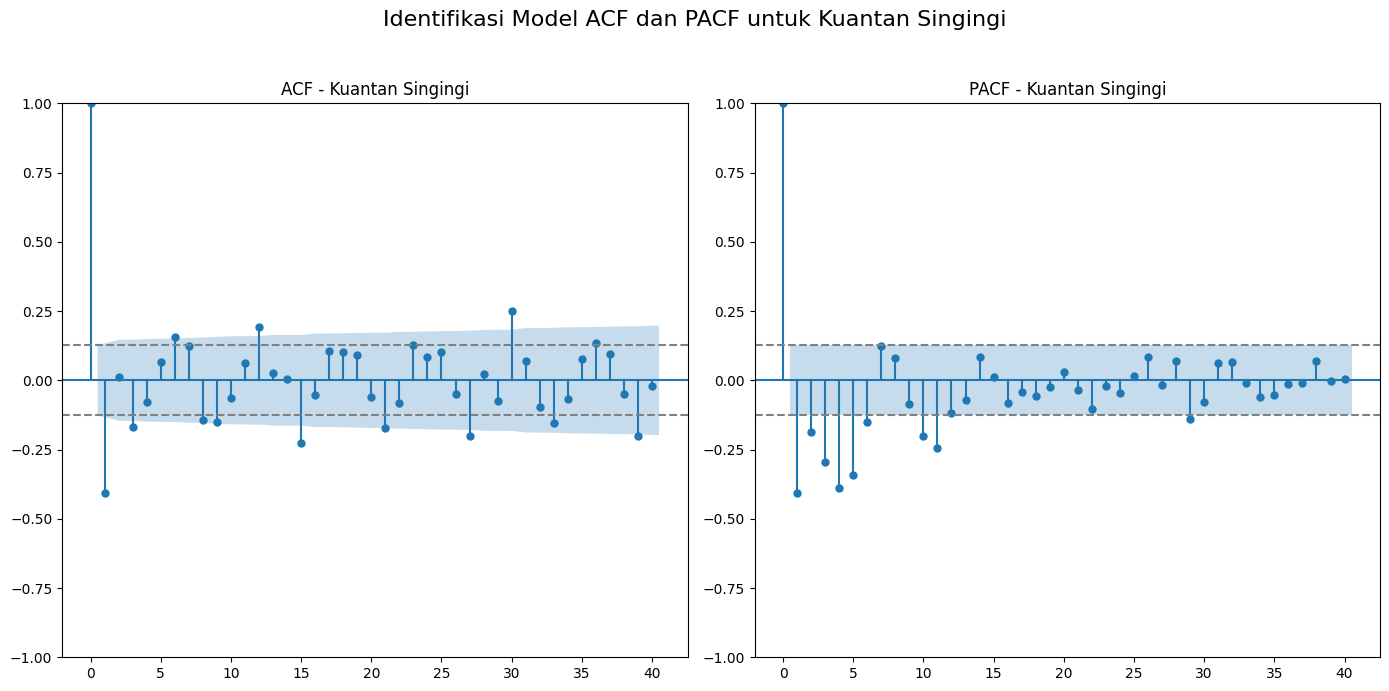

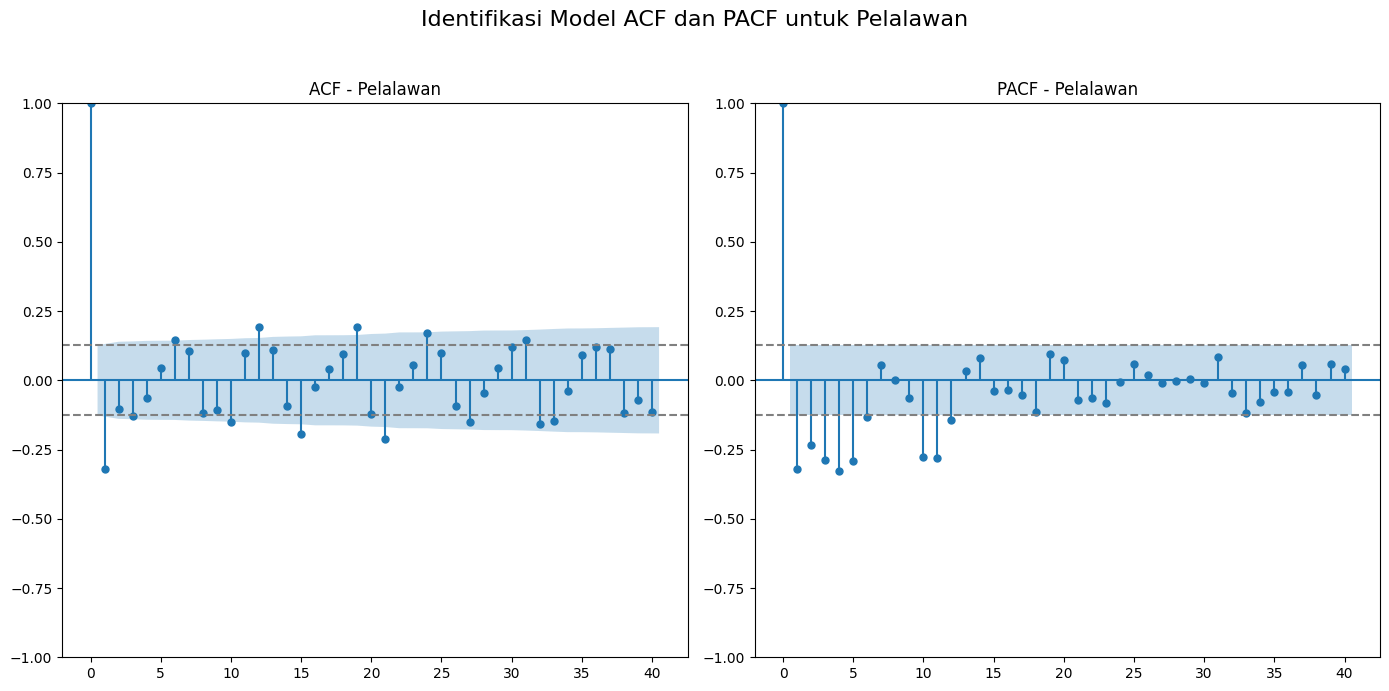

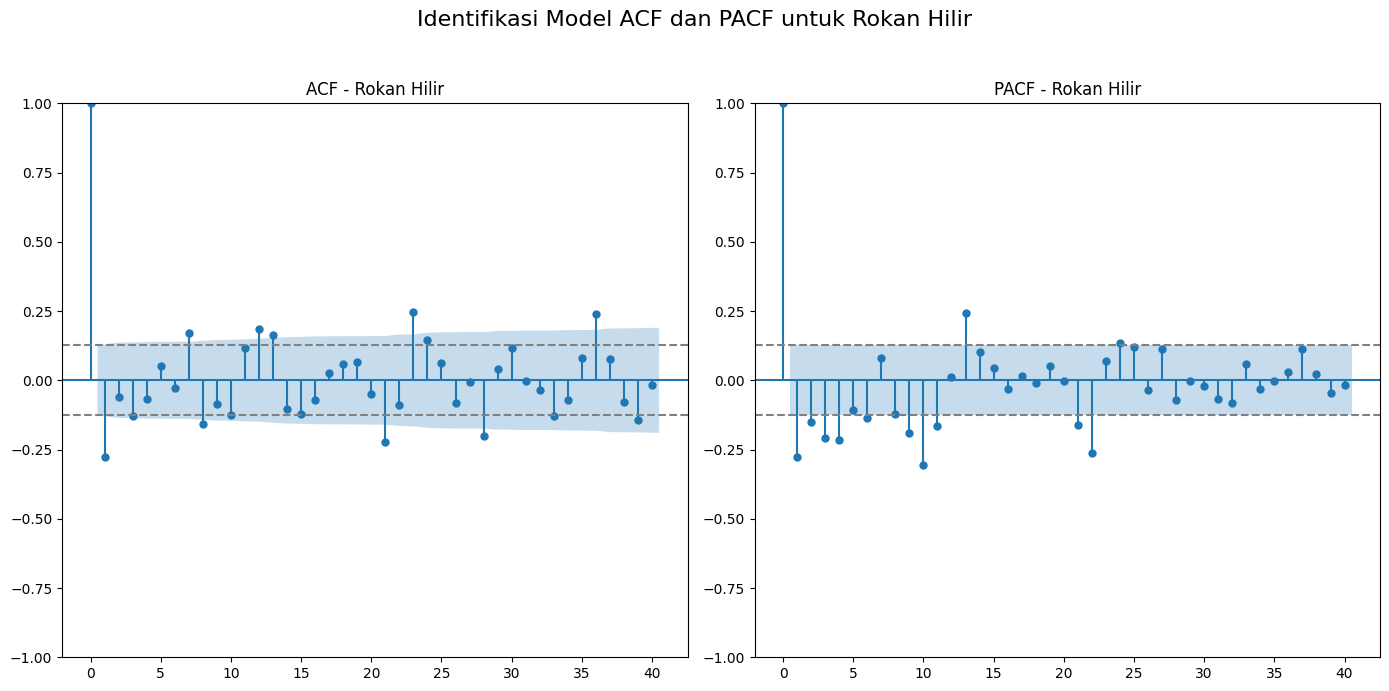

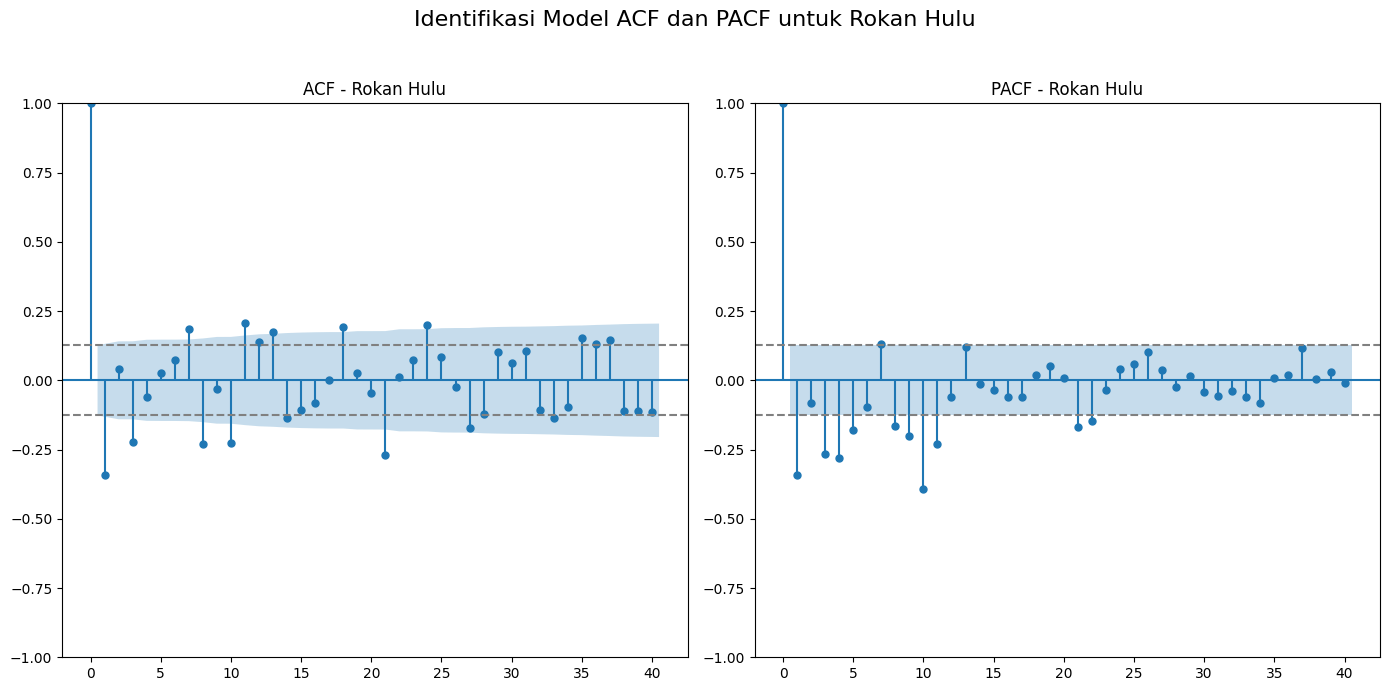

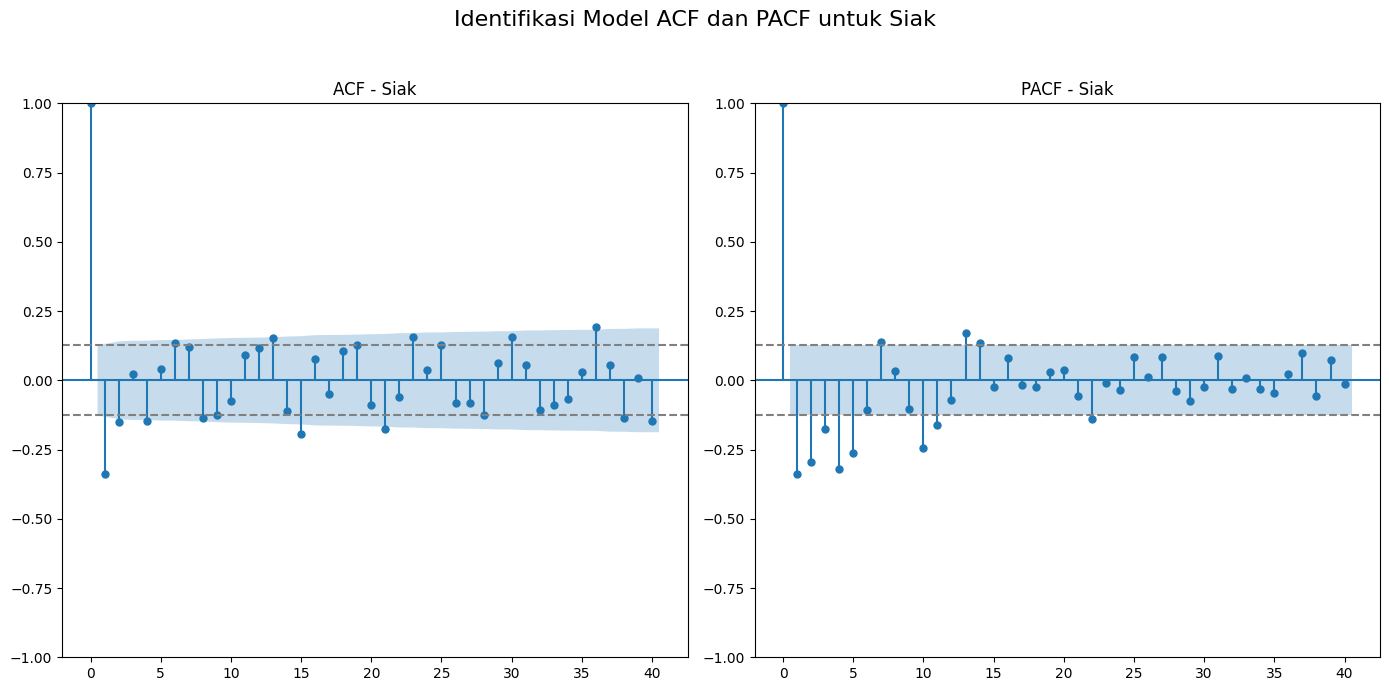

       Kota/Kabupaten  p  q  P (Musiman)  Q (Musiman)
0                Riau  8  5            0            1
1           Bengkalis  7  3            0            0
2     Indragiri Hilir  7  2            0            1
3      Indragiri Hulu  7  2            0            2
4              Kampar  8  2            1            1
5   Kepulauan Meranti  6  3            0            1
6          Kota Dumai  6  2            0            1
7      Kota Pekanbaru  7  2            2            0
8    Kuantan Singingi  7  2            1            1
9           Pelalawan  7  2            1            2
10        Rokan Hilir  5  2            0            1
11         Rokan Hulu  2  2            0            1
12               Siak  6  3            0            0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Load data
df = pd.read_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx', index_col='Date', parse_dates=True)

# Daftar kota/kabupaten yang ada di data
kota_kabupaten = df['Kota/Kabupaten'].unique()

results_list = []

for kota in kota_kabupaten:
    data_kota = df[df['Kota/Kabupaten'] == kota]['Rata-rata Suhu (°C) - Differenced'].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    plot_acf(data_kota, lags=40, alpha=0.05, ax=axes[0])
    axes[0].set_title(f'ACF - {kota}')

    N = len(data_kota)
    threshold = 1.96 / N**0.5
    axes[0].axhline(y=threshold, linestyle='--', color='gray')
    axes[0].axhline(y=-threshold, linestyle='--', color='gray')

    plot_pacf(data_kota, lags=40, alpha=0.05, ax=axes[1])
    axes[1].set_title(f'PACF - {kota}')

    axes[1].axhline(y=threshold, linestyle='--', color='gray')
    axes[1].axhline(y=-threshold, linestyle='--', color='gray')

    plt.suptitle(f'Identifikasi Model ACF dan PACF untuk {kota}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    acf_vals = acf(data_kota, nlags=40)
    pacf_vals = pacf(data_kota, nlags=40)

    p = next((i for i, val in enumerate(pacf_vals) if abs(val) < threshold), 1)
    q = next((i for i, val in enumerate(acf_vals) if abs(val) < threshold), 1)

    P = next((i for i, val in enumerate(pacf_vals[12::12]) if abs(val) < threshold), 1)
    Q = next((i for i, val in enumerate(acf_vals[12::12]) if abs(val) < threshold), 1)

    results_list.append({'Kota/Kabupaten': kota, 'p': p, 'q': q, 'P (Musiman)': P, 'Q (Musiman)': Q})

results = pd.DataFrame(results_list)

print(results)

Uji ADF untuk Riau: ADF Statistic = -5.2764, p-value = 0.0000


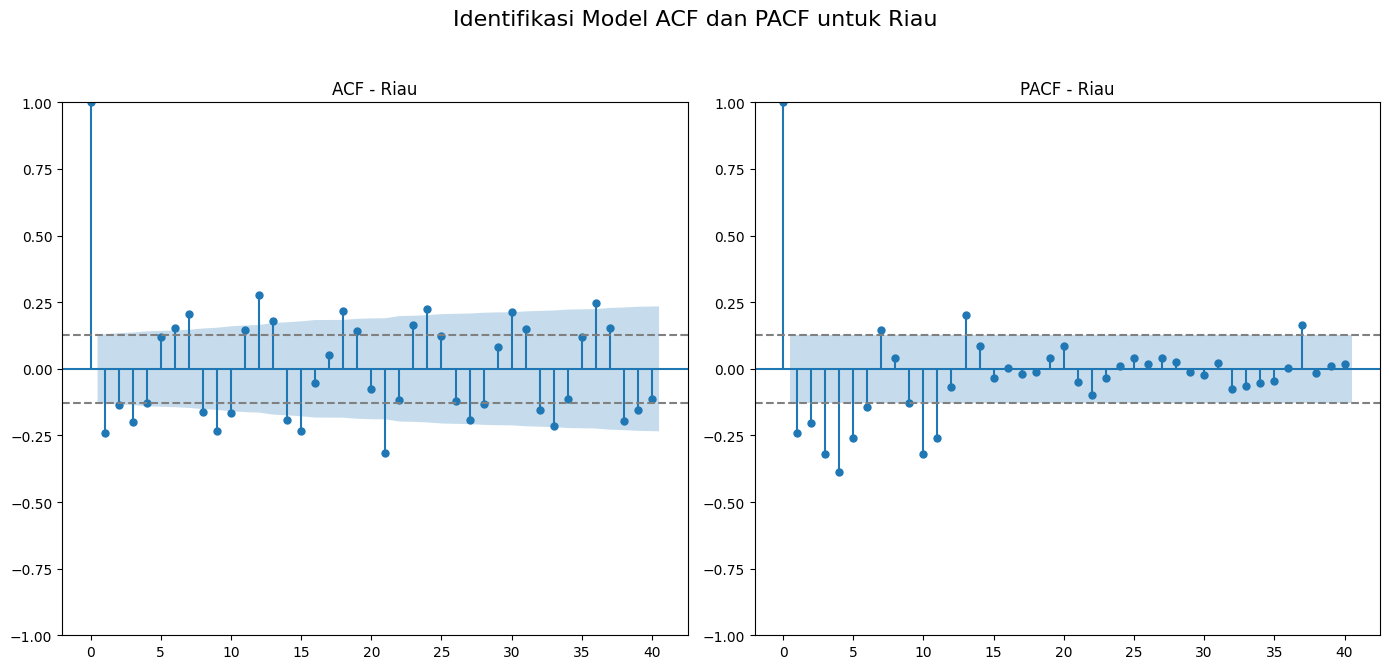

Uji ADF untuk Bengkalis: ADF Statistic = -9.6342, p-value = 0.0000


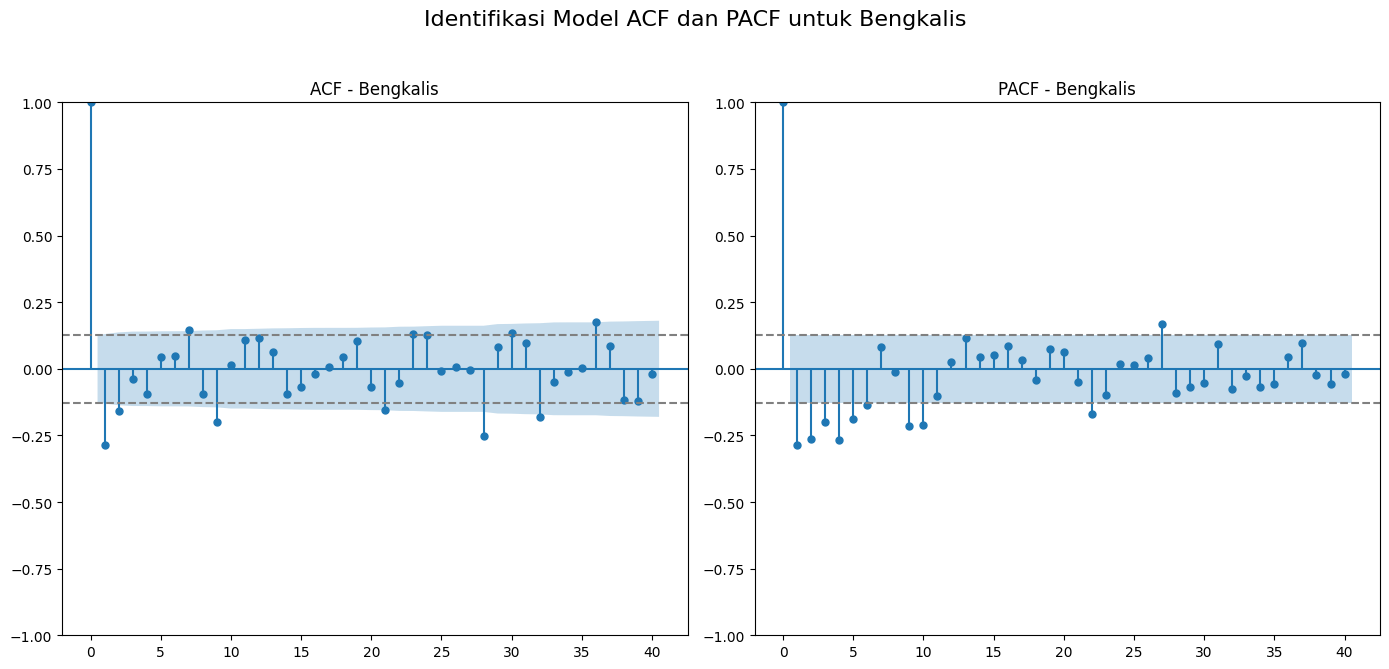

Uji ADF untuk Indragiri Hilir: ADF Statistic = -5.8488, p-value = 0.0000


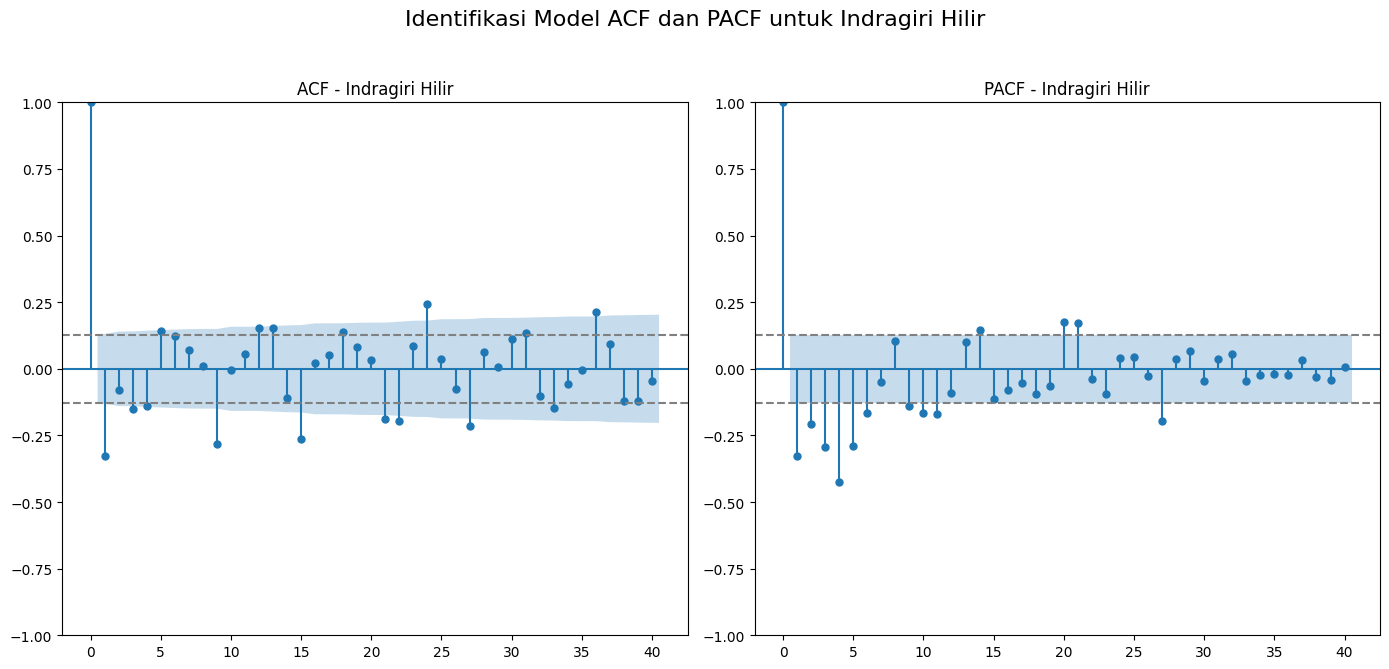

Uji ADF untuk Indragiri Hulu: ADF Statistic = -10.1247, p-value = 0.0000


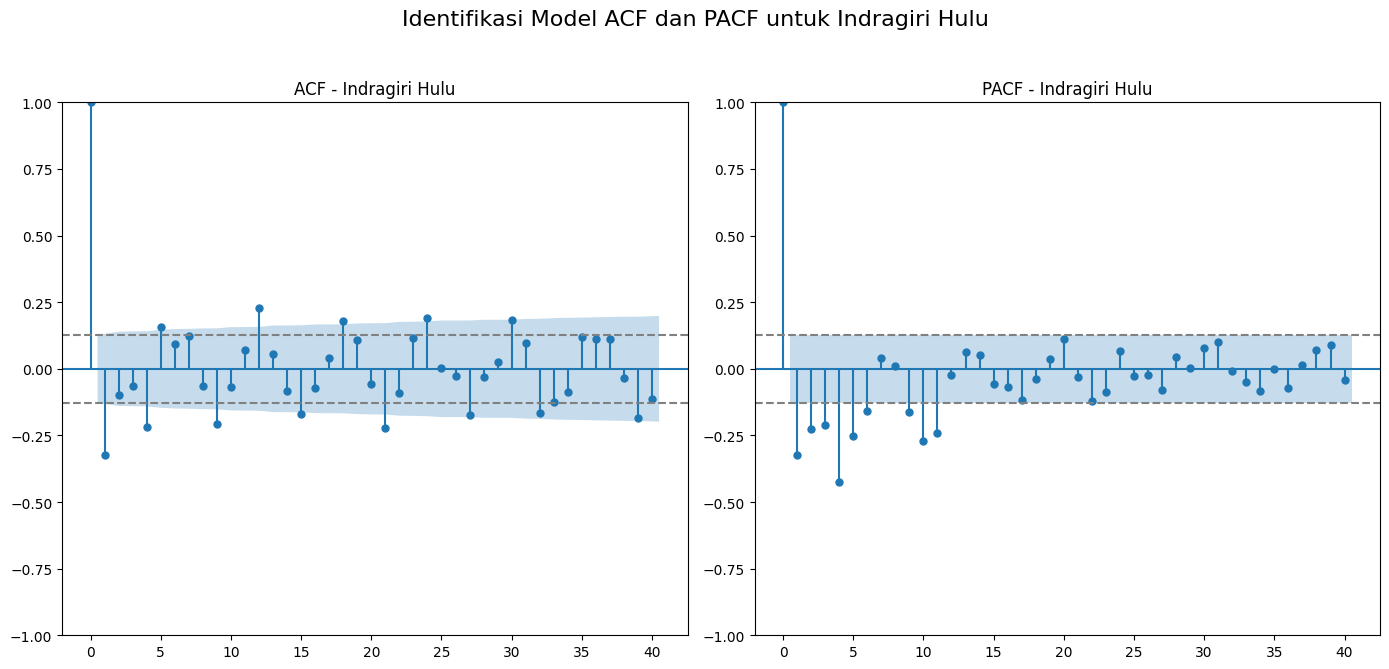

Uji ADF untuk Kampar: ADF Statistic = -6.0061, p-value = 0.0000


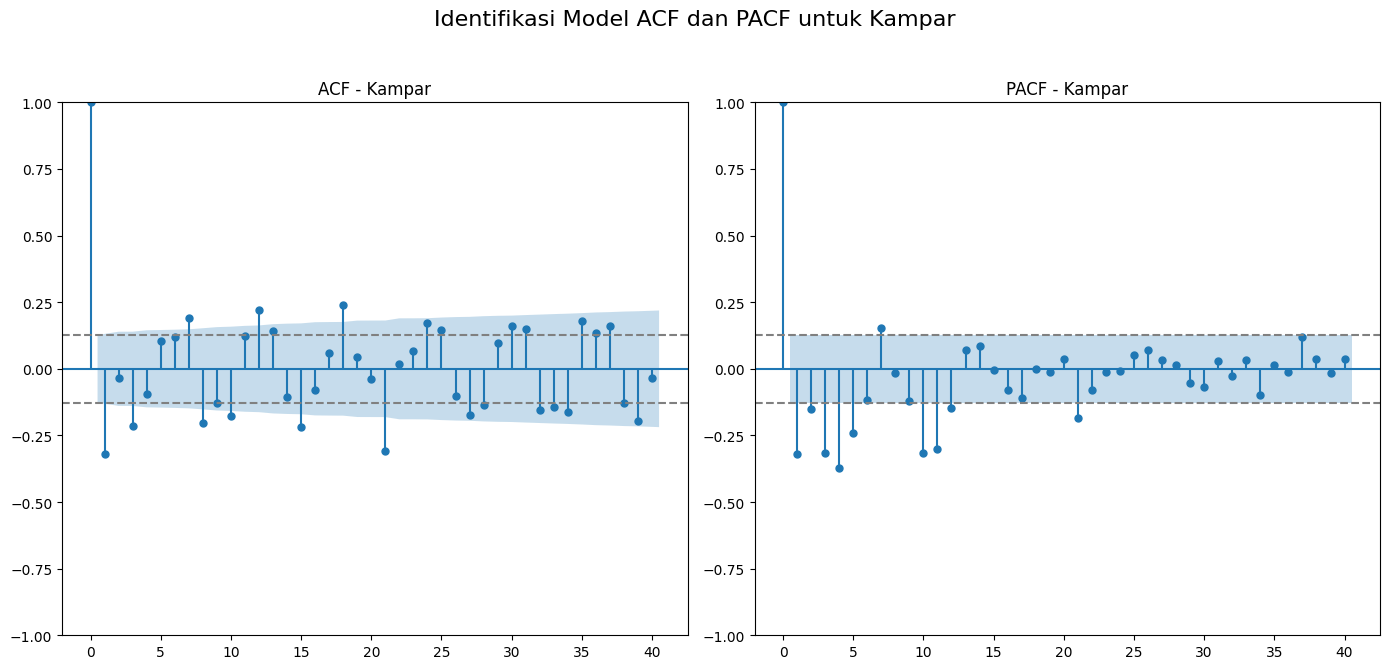

Uji ADF untuk Kepulauan Meranti: ADF Statistic = -3.6647, p-value = 0.0046


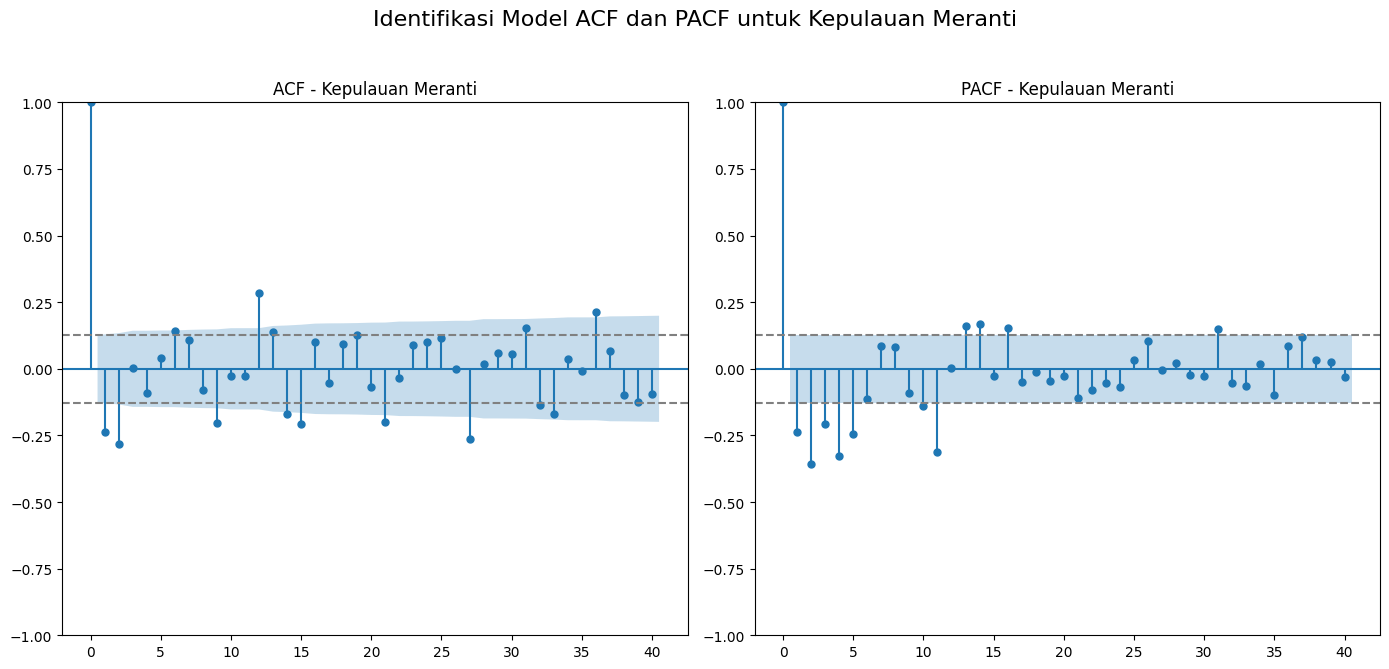

Uji ADF untuk Kota Dumai: ADF Statistic = -9.0040, p-value = 0.0000


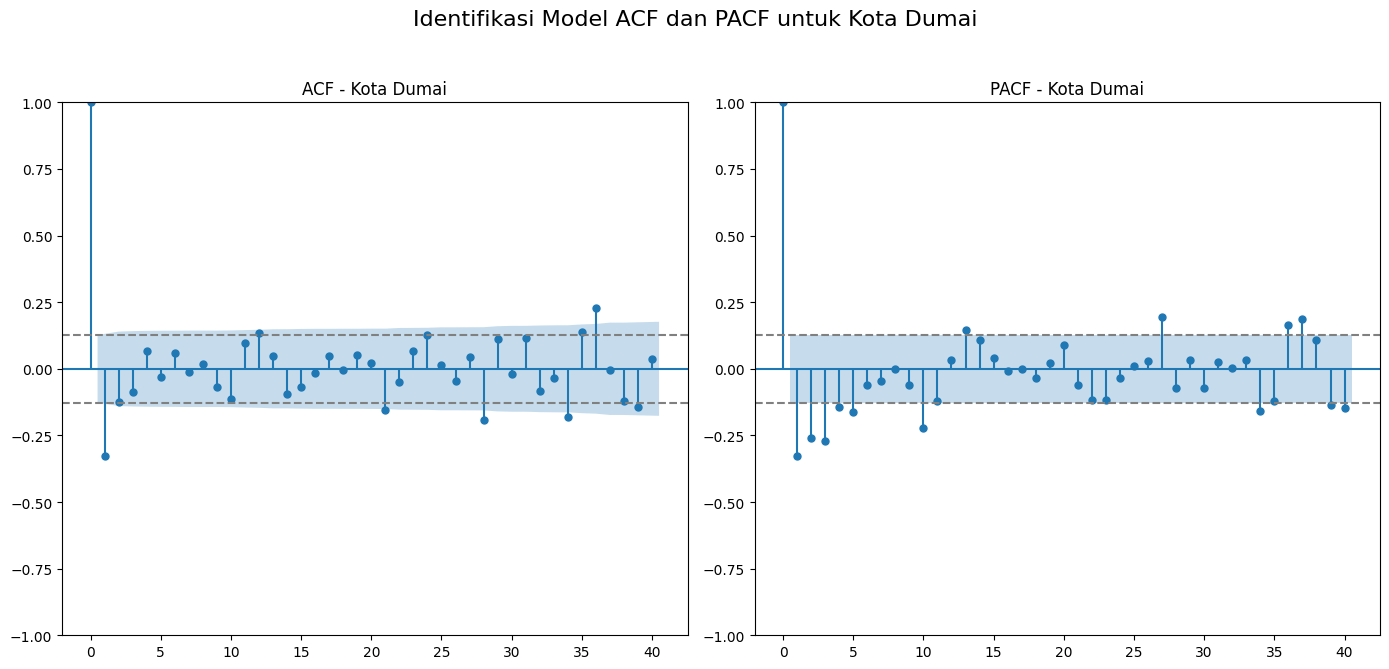

Uji ADF untuk Kota Pekanbaru: ADF Statistic = -10.2515, p-value = 0.0000


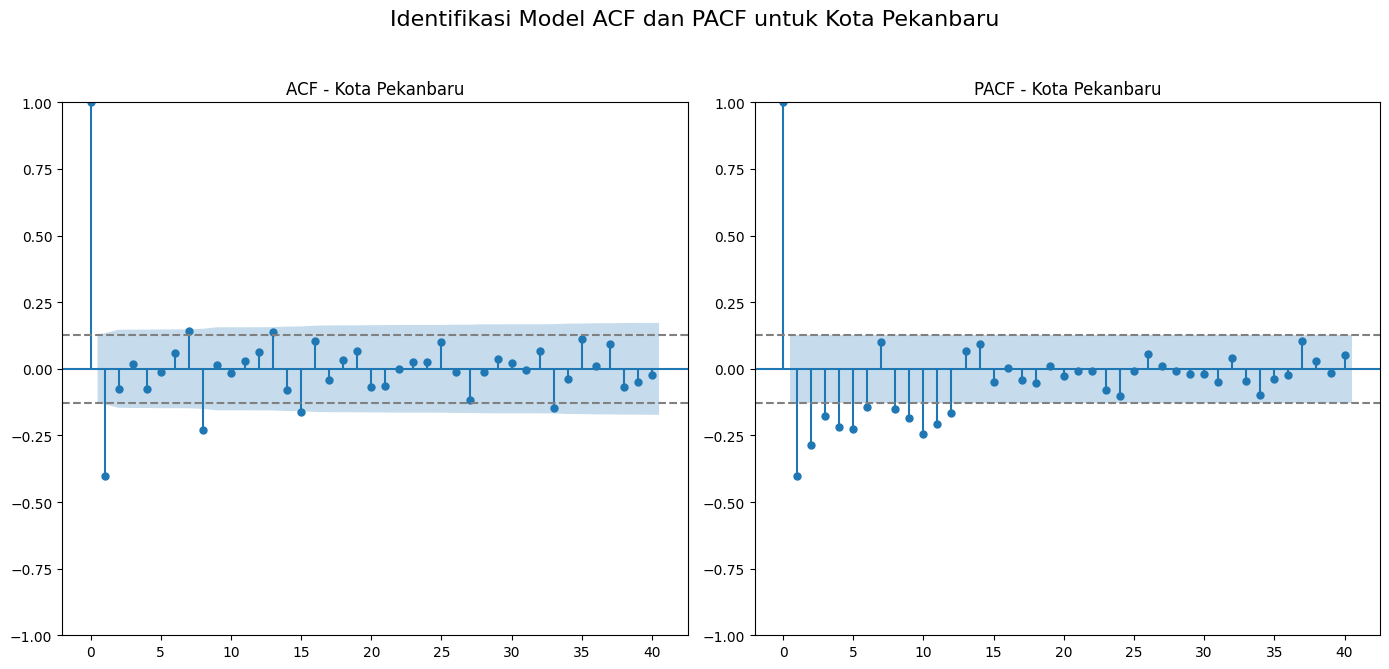

Uji ADF untuk Kuantan Singingi: ADF Statistic = -6.3359, p-value = 0.0000


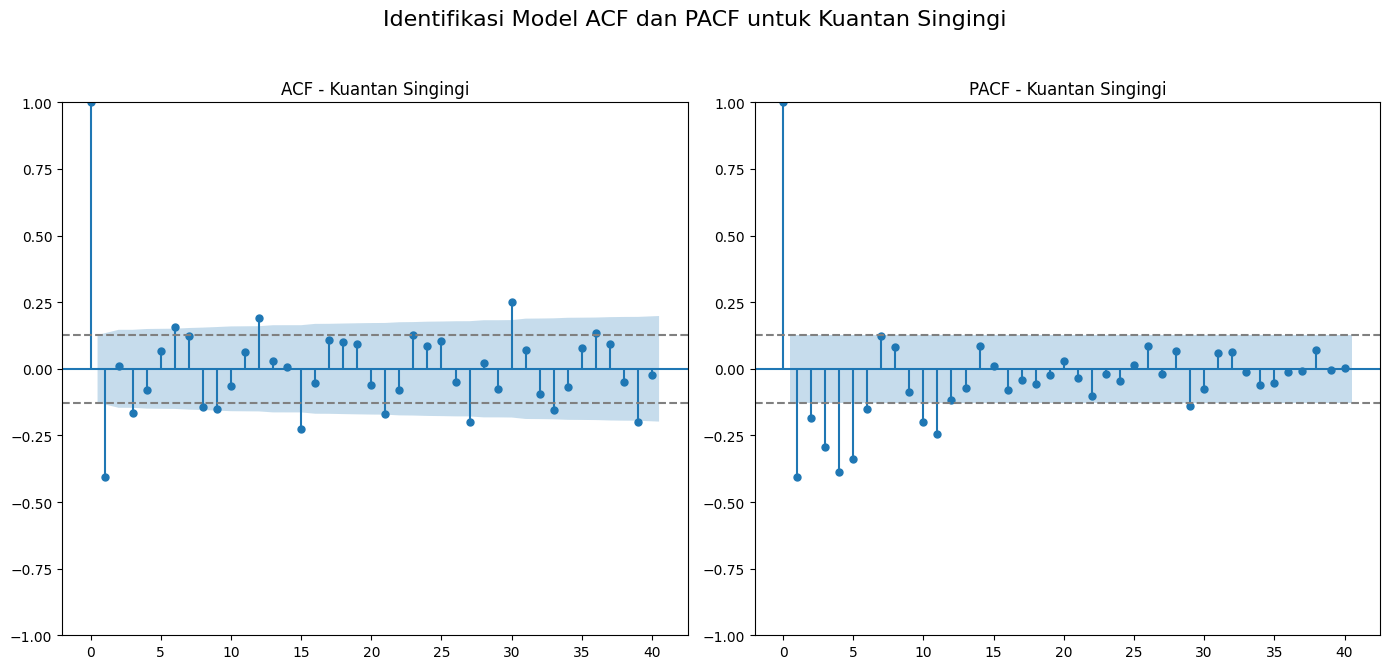

Uji ADF untuk Pelalawan: ADF Statistic = -9.9250, p-value = 0.0000


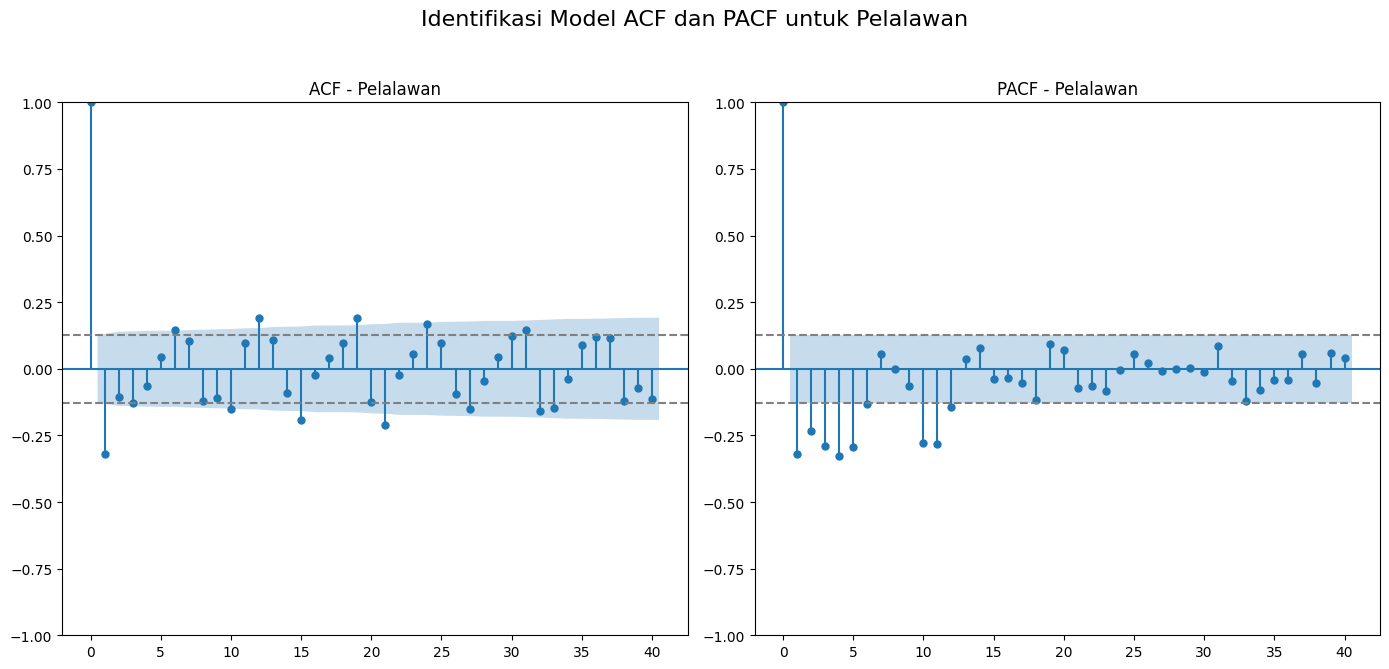

Uji ADF untuk Rokan Hilir: ADF Statistic = -5.1534, p-value = 0.0000


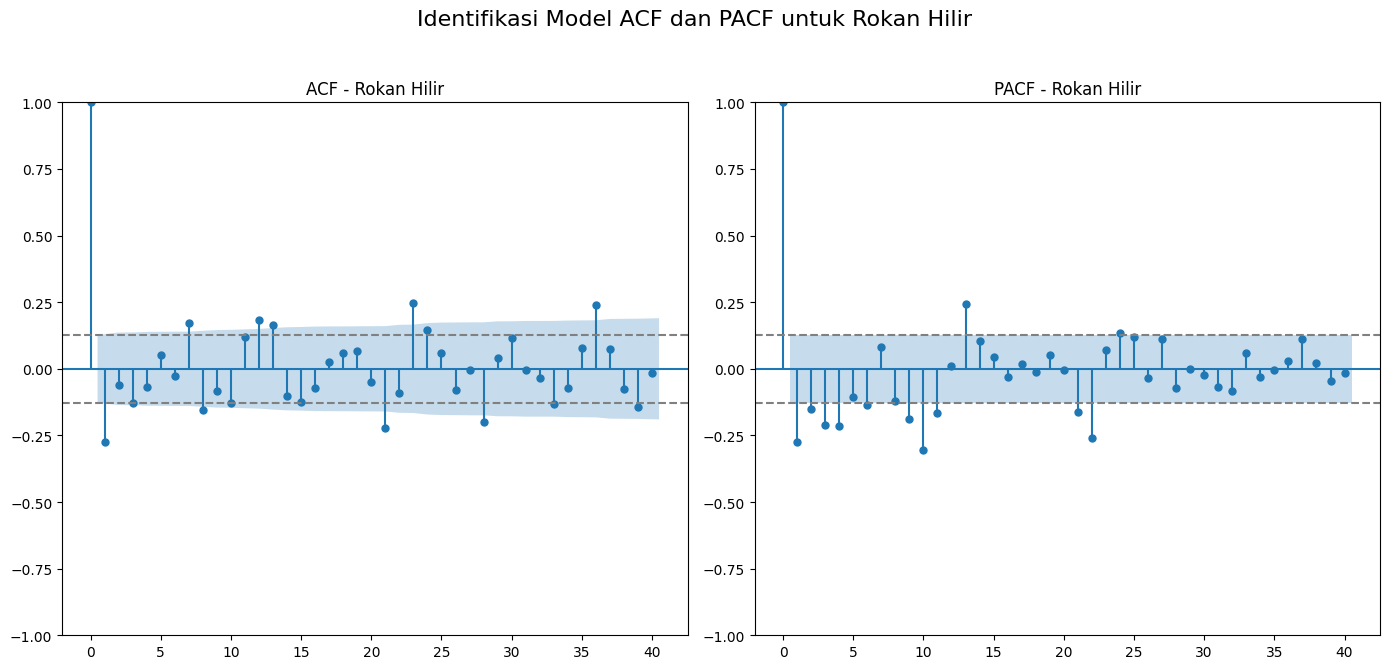

Uji ADF untuk Rokan Hulu: ADF Statistic = -7.0354, p-value = 0.0000


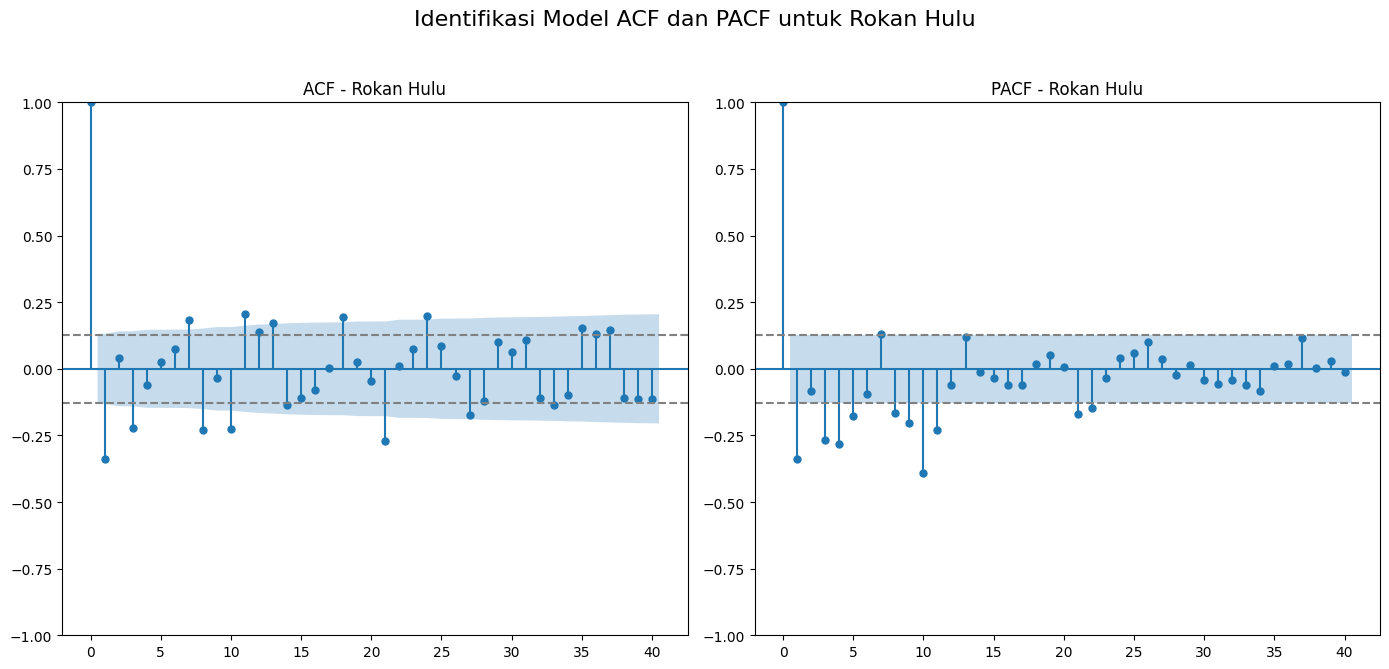

Uji ADF untuk Siak: ADF Statistic = -5.6950, p-value = 0.0000


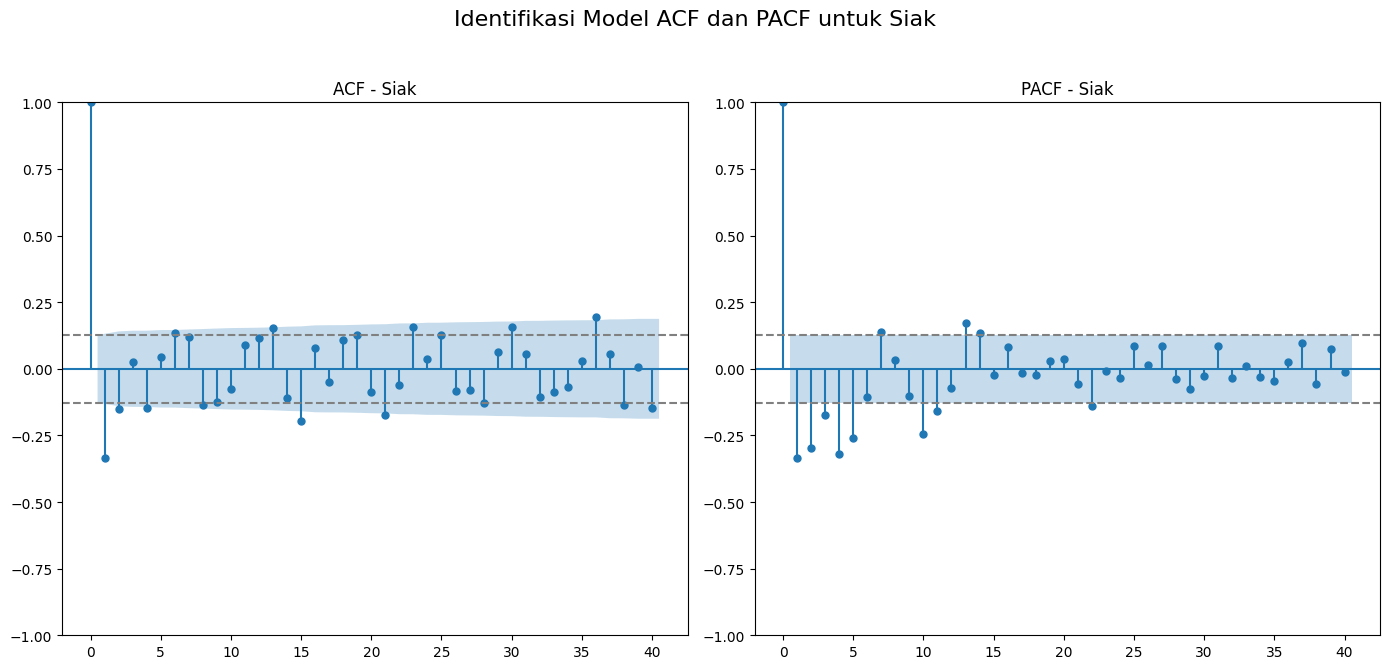


Tabel Hasil Identifikasi Model sebelum di Estimasi:
       Kota/Kabupaten  p  q  P (Musiman)  Q (Musiman)
0                Riau  8  5            1            0
1           Bengkalis  7  3            1            1
2     Indragiri Hilir  7  2            1            0
3      Indragiri Hulu  7  2            1            3
4              Kampar  8  2            2            0
5   Kepulauan Meranti  6  3            1            2
6          Kota Dumai  6  2            1            0
7      Kota Pekanbaru  7  2            3            1
8    Kuantan Singingi  7  2            2            2
9           Pelalawan  7  2            2            3
10        Rokan Hilir  5  2            1            0
11         Rokan Hulu  2  2            1            0
12               Siak  6  3            1            1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf, pacf

# Load data
df = pd.read_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx',
                   index_col='Date', parse_dates=True)

# Daftar kota/kabupaten yang ada di data
kota_kabupaten = df['Kota/Kabupaten'].unique()

# Inisialisasi list untuk menyimpan hasil
results_list = []

# Loop melalui setiap kota/kabupaten untuk analisis ACF dan PACF
for kota in kota_kabupaten:
    data_kota = df[df['Kota/Kabupaten'] == kota]['Rata-rata Suhu (°C) - Differenced'].dropna()

    # Uji stasioneritas dengan Augmented Dickey-Fuller test
    adf_result = adfuller(data_kota)
    print(f'Uji ADF untuk {kota}: ADF Statistic = {adf_result[0]:.4f}, p-value = {adf_result[1]:.4f}')

    # Tentukan threshold untuk signifikansi
    N = len(data_kota)
    threshold = 1.96 / (N**0.5)

    if adf_result[1] < 0.05:
        # Plot ACF dan PACF
        fig, axes = plt.subplots(1, 2, figsize=(14, 7))

        # Plot ACF
        plot_acf(data_kota, lags=40, alpha=0.05, ax=axes[0])
        axes[0].set_title(f'ACF - {kota}')
        axes[0].axhline(y=threshold, linestyle='--', color='gray')
        axes[0].axhline(y=-threshold, linestyle='--', color='gray')

        # Plot PACF
        plot_pacf(data_kota, lags=40, alpha=0.05, ax=axes[1], method='ywm')
        axes[1].set_title(f'PACF - {kota}')
        axes[1].axhline(y=threshold, linestyle='--', color='gray')
        axes[1].axhline(y=-threshold, linestyle='--', color='gray')

        plt.suptitle(f'Identifikasi Model ACF dan PACF untuk {kota}', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.savefig(f'/content/drive/MyDrive/ACF_PACF_{kota}.png')
        plt.show()

        # Hitung ACF dan PACF
        acf_vals = acf(data_kota, nlags=40)
        pacf_vals = pacf(data_kota, nlags=40)

        # Tentukan p dan q (non-musiman)
        p = next((i for i, val in enumerate(pacf_vals[1:], start=1) if abs(val) < threshold), 1)
        q = next((i for i, val in enumerate(acf_vals[1:], start=1) if abs(val) < threshold), 1)

        # Tentukan P dan Q (musiman)
        season_lag = 12  # Karena data bulanan
        P = next((i for i, val in enumerate(pacf_vals[season_lag::season_lag], start=1) if abs(val) < threshold), 0)
        Q = next((i for i, val in enumerate(acf_vals[season_lag::season_lag], start=1) if abs(val) < threshold), 0)

        # Tambahkan hasil ke list
        results_list.append({
            'Kota/Kabupaten': kota,
            'p': p,
            'q': q,
            'P (Musiman)': P,
            'Q (Musiman)': Q
        })
    else:
        print(f'Data untuk {kota} tidak stasioner, mungkin perlu differencing lebih lanjut.')

# Buat DataFrame dari hasil
results = pd.DataFrame(results_list)

# Tampilkan hasil
print("\nTabel Hasil Identifikasi Model sebelum di Estimasi:")
print(results)


In [ ]:
import statsmodels.api as sm

# Inisialisasi list untuk menyimpan hasil estimasi parameter
estimated_params_list = []

# Loop melalui setiap kota/kabupaten untuk estimasi parameter
for kota in kota_kabupaten:
    data_kota = df[df['Kota/Kabupaten'] == kota]['Rata-rata Suhu (°C) - Differenced'].dropna()

    # Ambil nilai p, d, q, P, D, Q dari hasil identifikasi sebelumnya
    model_params = results[results['Kota/Kabupaten'] == kota].iloc[0]
    p = model_params['p']
    q = model_params['q']
    P = model_params['P (Musiman)']
    Q = model_params['Q (Musiman)']
    D = 1  # Berdasarkan differencing yang telah dilakukan sebelumnya
    seasonal_order = (P, D, Q, 12)

    # Estimasi model SARIMA
    try:
        model = sm.tsa.SARIMAX(data_kota, order=(p, D, q), seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)

        # Simpan hasil estimasi parameter
        estimated_params_list.append({
            'Kota/Kabupaten': kota,
            'p': p,
            'd': D,
            'q': q,
            'P (Musiman)': P,
            'D (Musiman)': D,
            'Q (Musiman)': Q,
            'MLE Estimated Parameters': model_fit.params  # Fokus pada hasil estimasi MLE
        })

    except Exception as e:
        print(f'Estimasi parameter gagal untuk {kota} dengan error: {e}')

# Buat DataFrame dari hasil estimasi parameter
estimated_params_df = pd.DataFrame(estimated_params_list)

# Tampilkan hasil estimasi parameter
print("\nTabel Hasil Estimasi Parameter SARIMA (Hanya MLE):")
print(estimated_params_df)

# Simpan hasil ke dalam file Excel
# estimated_params_df.to_excel('/content/drive/MyDrive/Estimasi_Parameter_SARIMA_MLE.xlsx', index=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

Estimasi parameter gagal untuk Indragiri Hilir dengan error: LU decomposition error.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferr


Tabel Hasil Estimasi Parameter SARIMA (Hanya MLE):
       Kota/Kabupaten  p  d  q  P (Musiman)  D (Musiman)  Q (Musiman)  \
0                Riau  8  1  5            1            1            0   
1           Bengkalis  7  1  3            1            1            1   
2      Indragiri Hulu  7  1  2            1            1            3   
3              Kampar  8  1  2            2            1            0   
4   Kepulauan Meranti  6  1  3            1            1            2   
5          Kota Dumai  6  1  2            1            1            0   
6      Kota Pekanbaru  7  1  2            3            1            1   
7    Kuantan Singingi  7  1  2            2            1            2   
8           Pelalawan  7  1  2            2            1            3   
9         Rokan Hilir  5  1  2            1            1            0   
10         Rokan Hulu  2  1  2            1            1            0   
11               Siak  6  1  3            1            1            1   

In [ ]:
estimated_params_df

,Kota/Kabupaten,p,d,q,P (Musiman),D (Musiman),Q (Musiman),MLE Estimated Parameters
0,Riau,8,1,5,1,1,0,ar.L1 -2.653150 ar.L2 -4.116613 ar.L...
1,Bengkalis,7,1,3,1,1,1,ar.L1 -1.112150 ar.L2 -0.347633 ar.L...
2,Indragiri Hulu,7,1,2,1,1,3,ar.L1 -1.775349 ar.L2 -1.412349 ar.L...
3,Kampar,8,1,2,2,1,0,ar.L1 -1.648840 ar.L2 -1.274316 ar.L...
4,Kepulauan Meranti,6,1,3,1,1,2,ar.L1 -1.700702 ar.L2 -2.382573 ar.L...
5,Kota Dumai,6,1,2,1,1,0,ar.L1 -1.819334 ar.L2 -1.609212 ar.L...
6,Kota Pekanbaru,7,1,2,3,1,1,ar.L1 -1.796079 ar.L2 -1.527636 ar.L...
7,Kuantan Singingi,7,1,2,2,1,2,ar.L1 -1.945662 ar.L2 -1.669373 ar.L...
8,Pelalawan,7,1,2,2,1,3,ar.L1 -1.843931 ar.L2 -1.543973 ar.L...
9,Rokan Hilir,5,1,2,1,1,0,ar.L1 -1.752648 ar.L2 -1.354070 ar.L...


In [ ]:
import pandas as pd
import warnings
import statsmodels.api as sm

# Hilangkan peringatan
warnings.filterwarnings("ignore")

# Load data
df = pd.read_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx',
                   index_col='Date', parse_dates=True)

# Daftar kota/kabupaten yang ada di data
kota_kabupaten = df['Kota/Kabupaten'].unique()

# Inisialisasi list untuk menyimpan hasil estimasi parameter
estimated_params_list = []

# Loop melalui setiap kota/kabupaten untuk estimasi parameter
for kota in kota_kabupaten:
    data_kota = df[df['Kota/Kabupaten'] == kota]['Rata-rata Suhu (°C) - Differenced'].dropna()

    # Ambil nilai p, d, q, P, D, Q dari hasil identifikasi sebelumnya
    model_params = results[results['Kota/Kabupaten'] == kota].iloc[0]
    p = model_params['p']
    q = model_params['q']
    P = model_params['P (Musiman)']
    Q = model_params['Q (Musiman)']
    D = 1  # Berdasarkan differencing yang telah dilakukan sebelumnya
    seasonal_order = (P, D, Q, 12)

    # Estimasi model SARIMA
    try:
        model = sm.tsa.SARIMAX(data_kota, order=(p, D, q), seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)

        # Simpan hasil estimasi parameter
        estimated_params_list.append({
            'Kota/Kabupaten': kota,
            'p': p,
            'd': D,
            'q': q,
            'P (Musiman)': P,
            'D (Musiman)': D,
            'Q (Musiman)': Q,
            'Estimated Parameters': model_fit.params  # Hanya fokus pada parameter yang diestimasi oleh MLE
        })

    except Exception as e:
        print(f'Estimasi parameter gagal untuk {kota} dengan error: {e}')

# Buat DataFrame dari hasil estimasi parameter
estimated_params_df = pd.DataFrame(estimated_params_list)

# Tampilkan hasil estimasi parameter
print("\nTabel Hasil Estimasi Parameter SARIMA (Hanya MLE):")
print(estimated_params_df)

# Simpan hasil ke dalam file Excel
#estimated_params_df.to_excel('/content/drive/MyDrive/Estimasi_Parameter_SARIMA_MLE.xlsx', index=False)


Estimasi parameter gagal untuk Indragiri Hilir dengan error: LU decomposition error.

Tabel Hasil Estimasi Parameter SARIMA (Hanya MLE):
       Kota/Kabupaten  p  d  q  P (Musiman)  D (Musiman)  Q (Musiman)  \
0                Riau  8  1  5            1            1            0   
1           Bengkalis  7  1  3            1            1            1   
2      Indragiri Hulu  7  1  2            1            1            3   
3              Kampar  8  1  2            2            1            0   
4   Kepulauan Meranti  6  1  3            1            1            2   
5          Kota Dumai  6  1  2            1            1            0   
6      Kota Pekanbaru  7  1  2            3            1            1   
7    Kuantan Singingi  7  1  2            2            1            2   
8           Pelalawan  7  1  2            2            1            3   
9         Rokan Hilir  5  1  2            1            1            0   
10         Rokan Hulu  2  1  2            1            1    

In [ ]:
import pmdarima as pm
import pandas as pd

# Load data
df = pd.read_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx',
                   index_col='Date', parse_dates=True)

# Daftar kota/kabupaten yang ada di data
kota_kabupaten = df['Kota/Kabupaten'].unique()

# Buat DataFrame kosong untuk menyimpan hasil estimasi parameter
results = pd.DataFrame(columns=['Kota/Kabupaten', 'AR', 'I', 'MA', 'Seasonal AR', 'Seasonal I', 'Seasonal MA'])

# Loop melalui setiap kota/kabupaten untuk estimasi parameter
for kota in kota_kabupaten:
    # Filter data untuk kota/kabupaten saat ini
    data_kota = df[df['Kota/Kabupaten'] == kota]['Rata-rata Suhu (°C) - Differenced']

    # Drop NaN values untuk analisis
    data_kota = data_kota.dropna()

    # Gunakan Auto ARIMA dengan d=1
    try:
        model = pm.auto_arima(data_kota, start_p=0, start_q=0,
                              d=1,  # Set differencing to 1
                              seasonal=True, m=12, D=1,  # Seasonal differencing also set to 1
                              stepwise=True)

        # Buat DataFrame baru dengan hasil estimasi untuk kota saat ini
        new_row = pd.DataFrame({
            'Kota/Kabupaten': [kota],
            'AR': [model.order[0]],
            'I': [model.order[1]],  # This will be 1 as we set d=1
            'MA': [model.order[2]],
            'Seasonal AR': [model.seasonal_order[0]],
            'Seasonal I': [model.seasonal_order[1]],  # This will be 1 as we set D=1
            'Seasonal MA': [model.seasonal_order[2]]
        })

        # Gabungkan DataFrame baru dengan results menggunakan concat
        results = pd.concat([results, new_row], ignore_index=True)

        print(f'Estimasi parameter untuk {kota} berhasil: {model.summary()}')
    except Exception as e:
        print(f'Estimasi parameter untuk {kota} gagal: {str(e)}')

# Tampilkan tabel hasil estimasi
results.set_index('Kota/Kabupaten', inplace=True)
print(results)


Estimasi parameter untuk Riau berhasil:                                      SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  239
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -294.988
Date:                            Wed, 04 Sep 2024   AIC                            605.976
Time:                                    14:14:49   BIC                            633.340
Sample:                                02-01-2001   HQIC                           617.019
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5449      0.073    -21.295      0.000      -1.687      -1

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pmdarima import auto_arima
import warnings

# Hilangkan peringatan
warnings.filterwarnings("ignore")

# Load data
df = pd.read_excel('/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau_setelah_differencing.xlsx',
                   index_col='Date', parse_dates=True)

# Daftar kota/kabupaten yang ada di data
kota_kabupaten = df['Kota/Kabupaten'].unique()

# Inisialisasi list untuk menyimpan hasil estimasi parameter
auto_arima_results = []

# Loop melalui setiap kota/kabupaten untuk estimasi parameter
for kota in kota_kabupaten:
    data_kota = df[df['Kota/Kabupaten'] == kota]['Rata-rata Suhu (°C) - Differenced']

    # Menggunakan auto_arima untuk memilih model ARIMA terbaik
    stepwise_fit = auto_arima(
        data_kota,          # Data suhu setelah differencing
        start_p=0,         # Nilai awal untuk AR(p)
        start_q=0,         # Nilai awal untuk MA(q)
        max_p=8,           # Nilai maksimum untuk AR(p)
        max_q=5,           # Nilai maksimum untuk MA(q)
        m=12,              # Periode musiman (misalnya, 12 bulan dalam setahun)
        seasonal=True,     # Aktifkan komponen musiman
        max_P=3,
        max_Q=3,
        D=1,            # Menentukan differencing otomatis
        d=1,            # Menentukan urutan differencing otomatis
        trace=True,        # Menampilkan informasi kemajuan
        error_action='ignore',  # Abaikan kesalahan
        suppress_warnings=True, # Sembunyikan peringatan konvergensi
        stepwise=True      # Pencarian langkah demi langkah
    )

    # Simpan hasil estimasi parameter
    auto_arima_results.append({
        'Kota/Kabupaten': kota,
        'Best Model': stepwise_fit.summary().as_text()  # Menyimpan ringkasan model sebagai teks
    })

# Buat DataFrame dari hasil estimasi parameter
results_df = pd.DataFrame(auto_arima_results)

# Tampilkan hasil estimasi parameter
print("\nTabel Hasil Estimasi Parameter ARIMA per Kota/Kabupaten:")
print(results_df)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.83 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=990.715, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=798.723, Time=0.56 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=6.00 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=842.676, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=768.380, Time=0.41 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=758.542, Time=0.90 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=6.61 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.87 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=903.155, Time=1.99 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=671.741, Time=1.08 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=685.546, Time=0.55 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=5.57 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.61 sec
 ARIMA(3,1,0)(3,1,0)[12]             : AIC=625.233, Time=

In [ ]:
results_df

,Kota/Kabupaten,Best Model
0,Riau,SARIMAX ...
1,Bengkalis,SARIMAX R...
2,Indragiri Hilir,SARIMA...
3,Indragiri Hulu,SARIMAX R...
4,Kampar,SARIMA...
5,Kepulauan Meranti,SARIMA...
6,Kota Dumai,SARIMA...
7,Kota Pekanbaru,SARIMA...
8,Kuantan Singingi,SARIMA...
9,Pelalawan,SARIMA...


In [ ]:
# Mengambil ringkasan model ARIMA untuk kota tertentu
model_summary = stepwise_fit.summary()
print(model_summary)


                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  239
Model:             SARIMAX(2, 0, 3)x(0, 0, [1, 2], 12)   Log Likelihood                -323.995
Date:                                 Wed, 04 Sep 2024   AIC                            663.991
Time:                                         15:16:28   BIC                            691.803
Sample:                                     02-01-2001   HQIC                           675.198
                                          - 12-01-2020                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9897      0.013     75.552      0.000       0.964       1